In [1]:
from pycaret.anomaly import *
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 500)
#set_option('precision', 3)
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.preprocessing import binarize,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV ,calibration_curve
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.combine import SMOTEENN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score,sensitivity_score,specificity_score
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier,RUSBoostClassifier
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import SCORERS
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from scipy import stats
from scipy.stats import norm
from numpy import mean
from numpy import std
from scipy import stats
import numpy as np
from imblearn.metrics import sensitivity_score,specificity_score
import matplotlib as mlt
mlt.rcParams['figure.dpi'] = 350

sns.set_style(style='dark')
%matplotlib inline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,average_precision_score
from pycaret.classification import load_model
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Customer churn prediction: Telecom Churn Dataset

Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.



### [Attributes information:]()
   * *state*                     
   * *account length*            
   * *area code*                 
   * *phone number*              
   * *international plan*        
   * *voice mail plan*           
   * *number vmail messages*     
   * *total day minutes*         
   * *total day calls*           
   * *total day charge*          
   * *total eve minutes*         
   * *total eve calls*           
   * *total eve charge*          
   * *total night minutes*       
   * *total night calls*         
   * *total night charge*        
   * *total intl minutes*        
   * *total intl calls*          
   * *total intl charge*         
   * *customer service calls*    
   * *churn*                      

In [2]:
df = pd.read_csv("bigml.csv")

df

state  account length  area code phone number international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
0       KS             128        415     382-4657                 no             yes                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1  False
1       OH             107        415     371-7191                 no             yes                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13.7                 3               3.70                       1  False
2       NJ             137        415     358-1921                 no              no                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                7.32                12.2                 5               3.29                       0  False
3       OH              84        408     375-9999                yes              no                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                8.86                 6.6                 7               1.78                       2  False
4       OK              75        415     330-6626                yes              no                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                8.41                10.1                 3               2.73                       3  False
...    ...             ...        ...          ...                ...             ...                    ...                ...              ...               ...                ...              ...               ...                  ...                ...                 ...                 ...               ...                ...                     ...    ...
3328    AZ             192        415     414-4276                 no             yes                     36              156.2               77             26.55              215.5              126             18.32                279.1                 83               12.56                 9.9                 6               2.67                       2  False
3329    WV              68        415     370-3271                 no              no                      0              231.1               57             39.29              153.4               55             13.04                191.3                123                8.61                 9.6                 4               2.59                       3  False
3330    RI              28        510     328-8230                 no              no                      0              180.8              109             30.74              288.8               58             24.55                191.9                 91                8.64                14.1                 6               3.81                       2  False
3331    CT             184        510     364-6381                yes              no                      0              213.8              105             36.35              159.6               84             13.57                139.2                137                6.26                 5.0                10               1.35                      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

account length    area code  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls
count     3333.000000  3333.000000            3333.000000        3333.000000      3333.000000       3333.000000        3333.000000      3333.000000       3333.000000          3333.000000        3333.000000         3333.000000         3333.000000       3333.000000        3333.000000             3333.000000
mean       101.064806   437.182418               8.099010         179.775098       100.435644         30.562307         200.980348       100.114311         17.083540           200.872037         100.107711            9.039325           10.237294          4.479448           2.764581                1.562856
std         39.822106    42.371290              13.688365          54.467389        20.069084          9.259435          50.713844        19.922625          4.310668            50.573847          19.568609            2.275873            2.791840          2.461214           0.753773                1.315491
min          1.000000   408.000000               0.000000           0.000000         0.000000          0.000000           0.000000         0.000000          0.000000            23.200000          33.000000            1.040000            0.000000          0.000000           0.000000                0.000000
25%         74.000000   408.000000               0.000000         143.700000        87.000000         24.430000         166.600000        87.000000         14.160000           167.000000          87.000000            7.520000            8.500000          3.000000           2.300000                1.000000
50%        101.000000   415.000000               0.000000         179.400000       101.000000         30.500000         201.400000       100.000000         17.120000           201.200000         100.000000            9.050000           10.300000          4.000000           2.780000                1.000000
75%        127.000000   510.000000              20.000000         216.400000       114.000000         36.790000         235.300000       114.000000         20.000000           235.300000         113.000000           10.590000           12.100000          6.000000           3.270000                2.000000
max        243.000000   510.000000              51.000000         350.800000       165.000000         59.640000         363.700000       170.000000         30.910000           395.000000         175.000000           17.770000           20.000000         20.000000           5.400000                9.000000

In [5]:
df.describe(include = 'object')

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

In [6]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.columns

Index(['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'], dtype='object')

In [8]:
df.drop(columns=['phone number','state','account length','area code'],inplace = True)
df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'], dtype='object')

In [9]:
# summarize the number of unique values in each column
print(df.nunique())

international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [10]:
# locate rows of duplicate data
df.duplicated().any()

False

In [11]:
df['churn'] = df['churn'].map({False : 0 , True : 1})
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [12]:
df['churn'].value_counts(normalize = True)*100

0    85.508551
1    14.491449
Name: churn, dtype: float64

In [13]:
df.shape

(3333, 17)

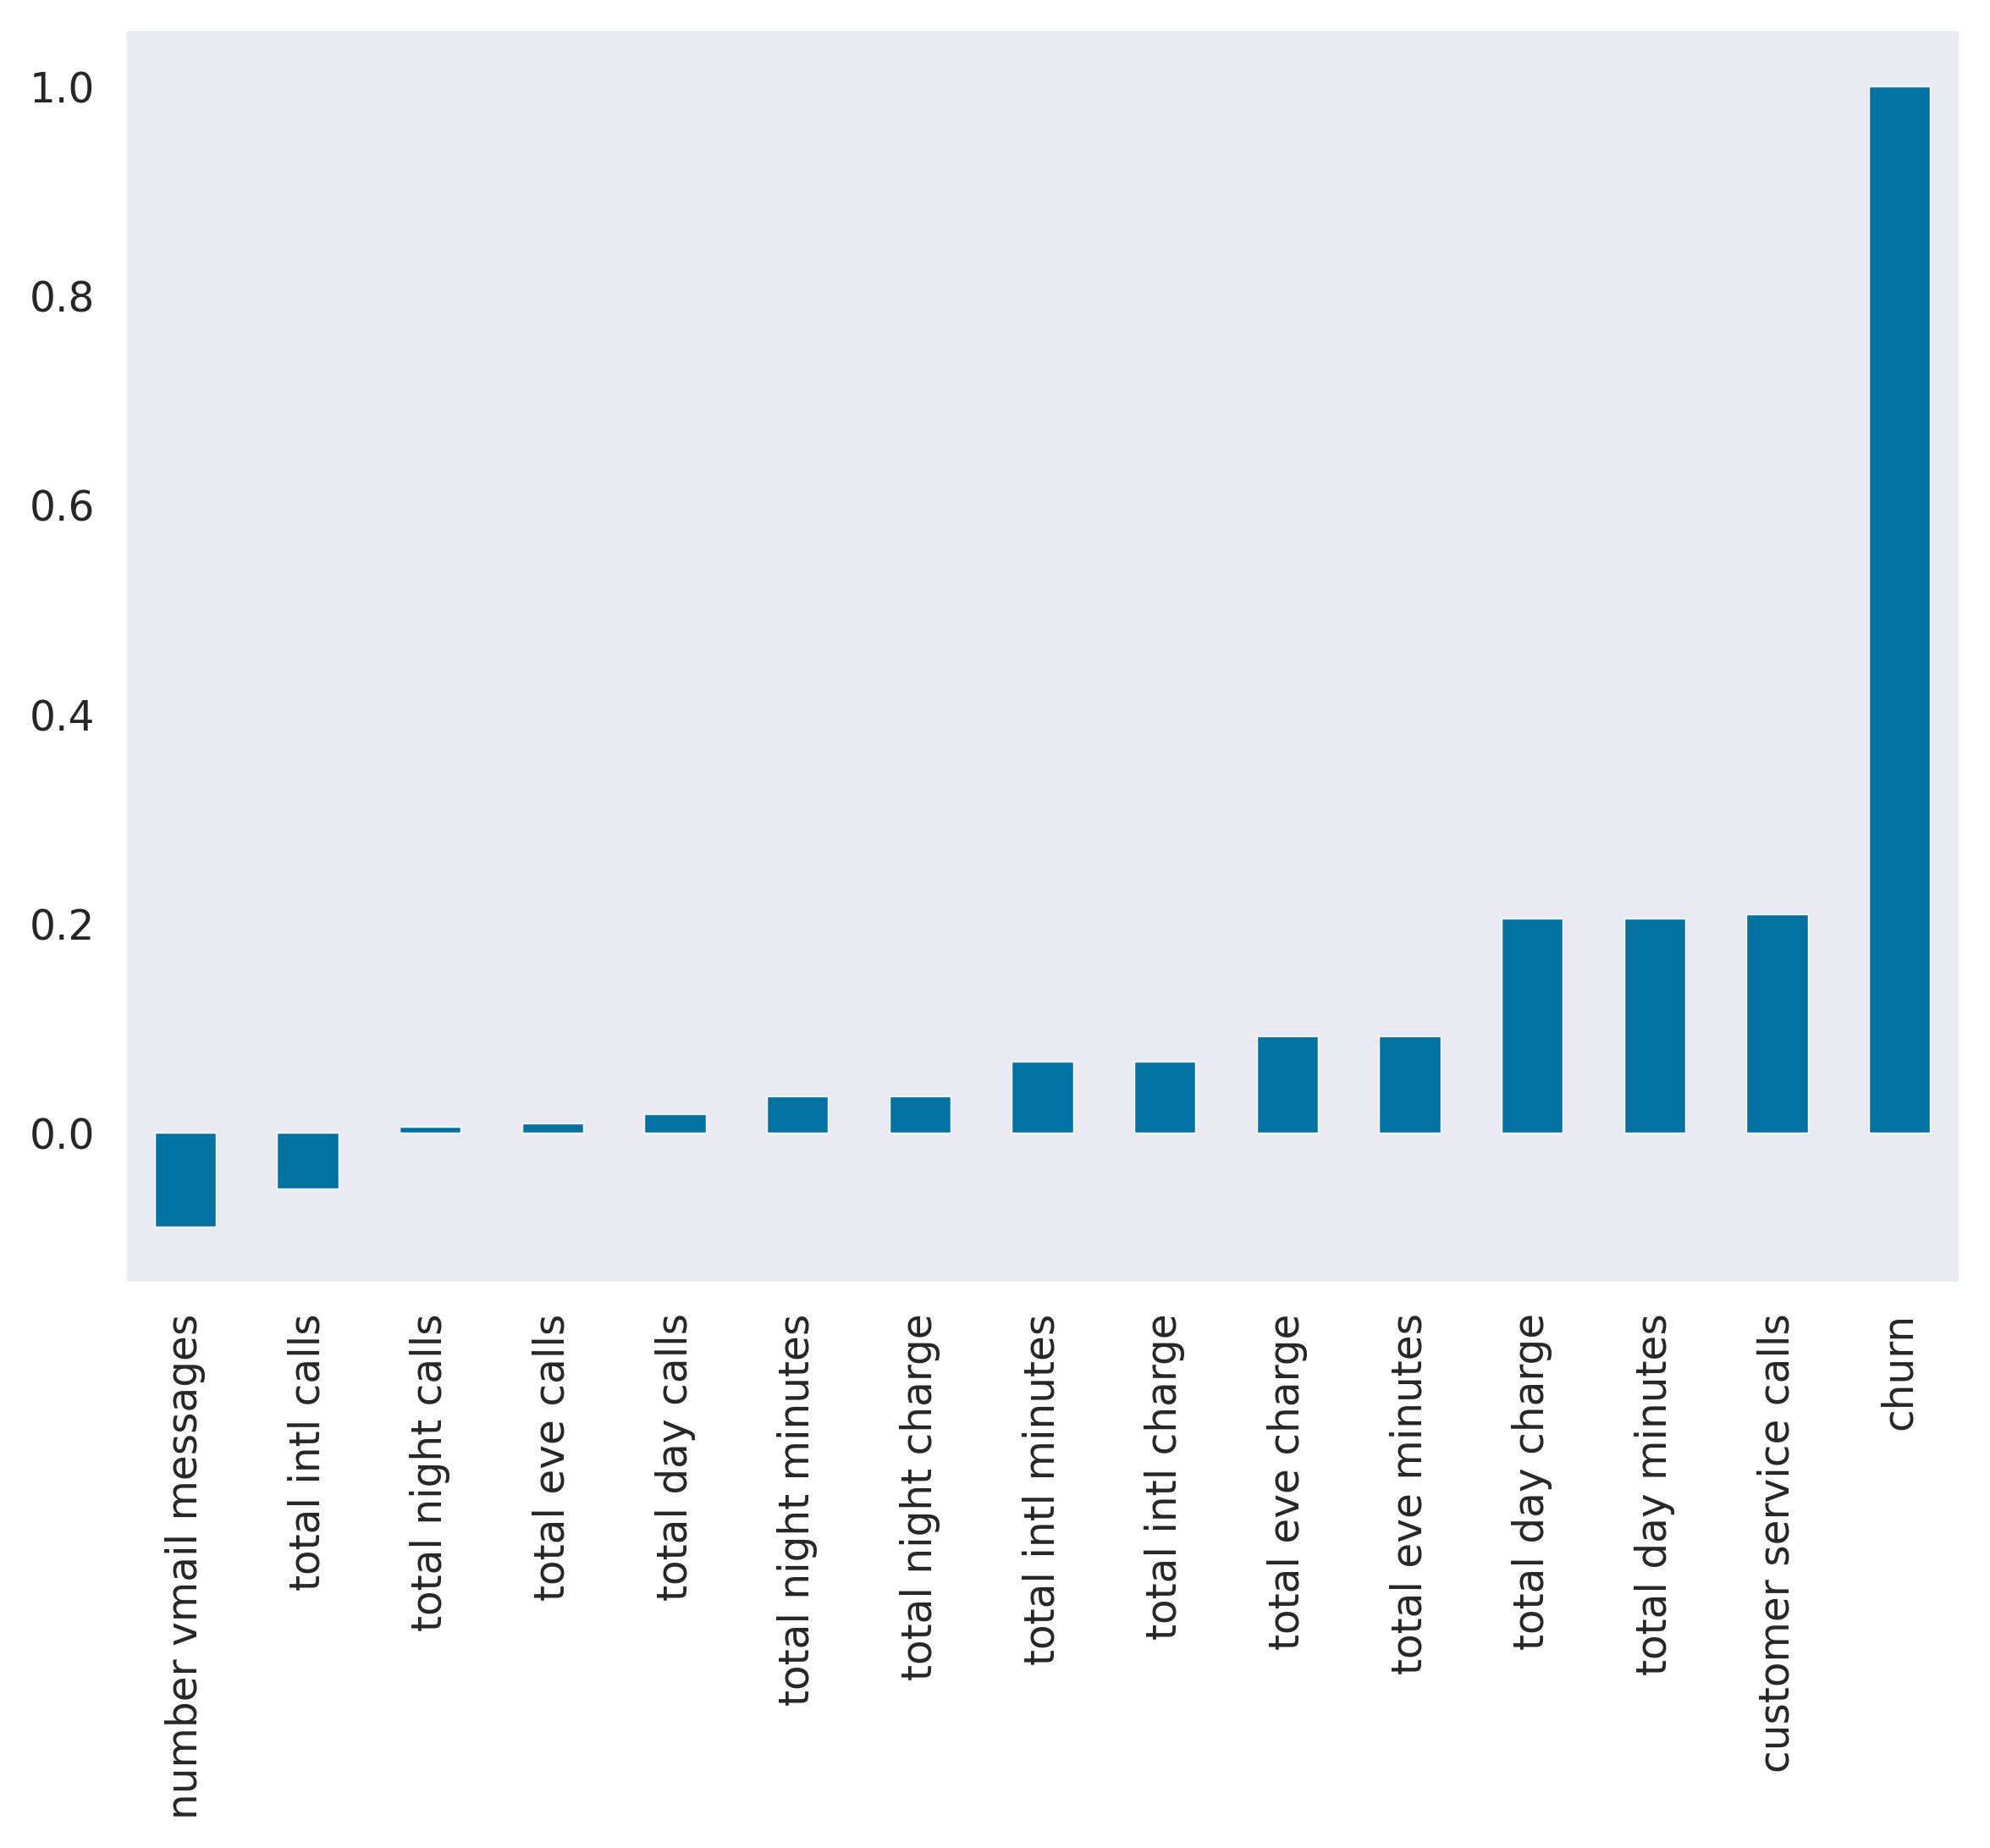

In [14]:
# plot correlation
df.corr()['churn'].sort_values().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix(for heart dataset)')

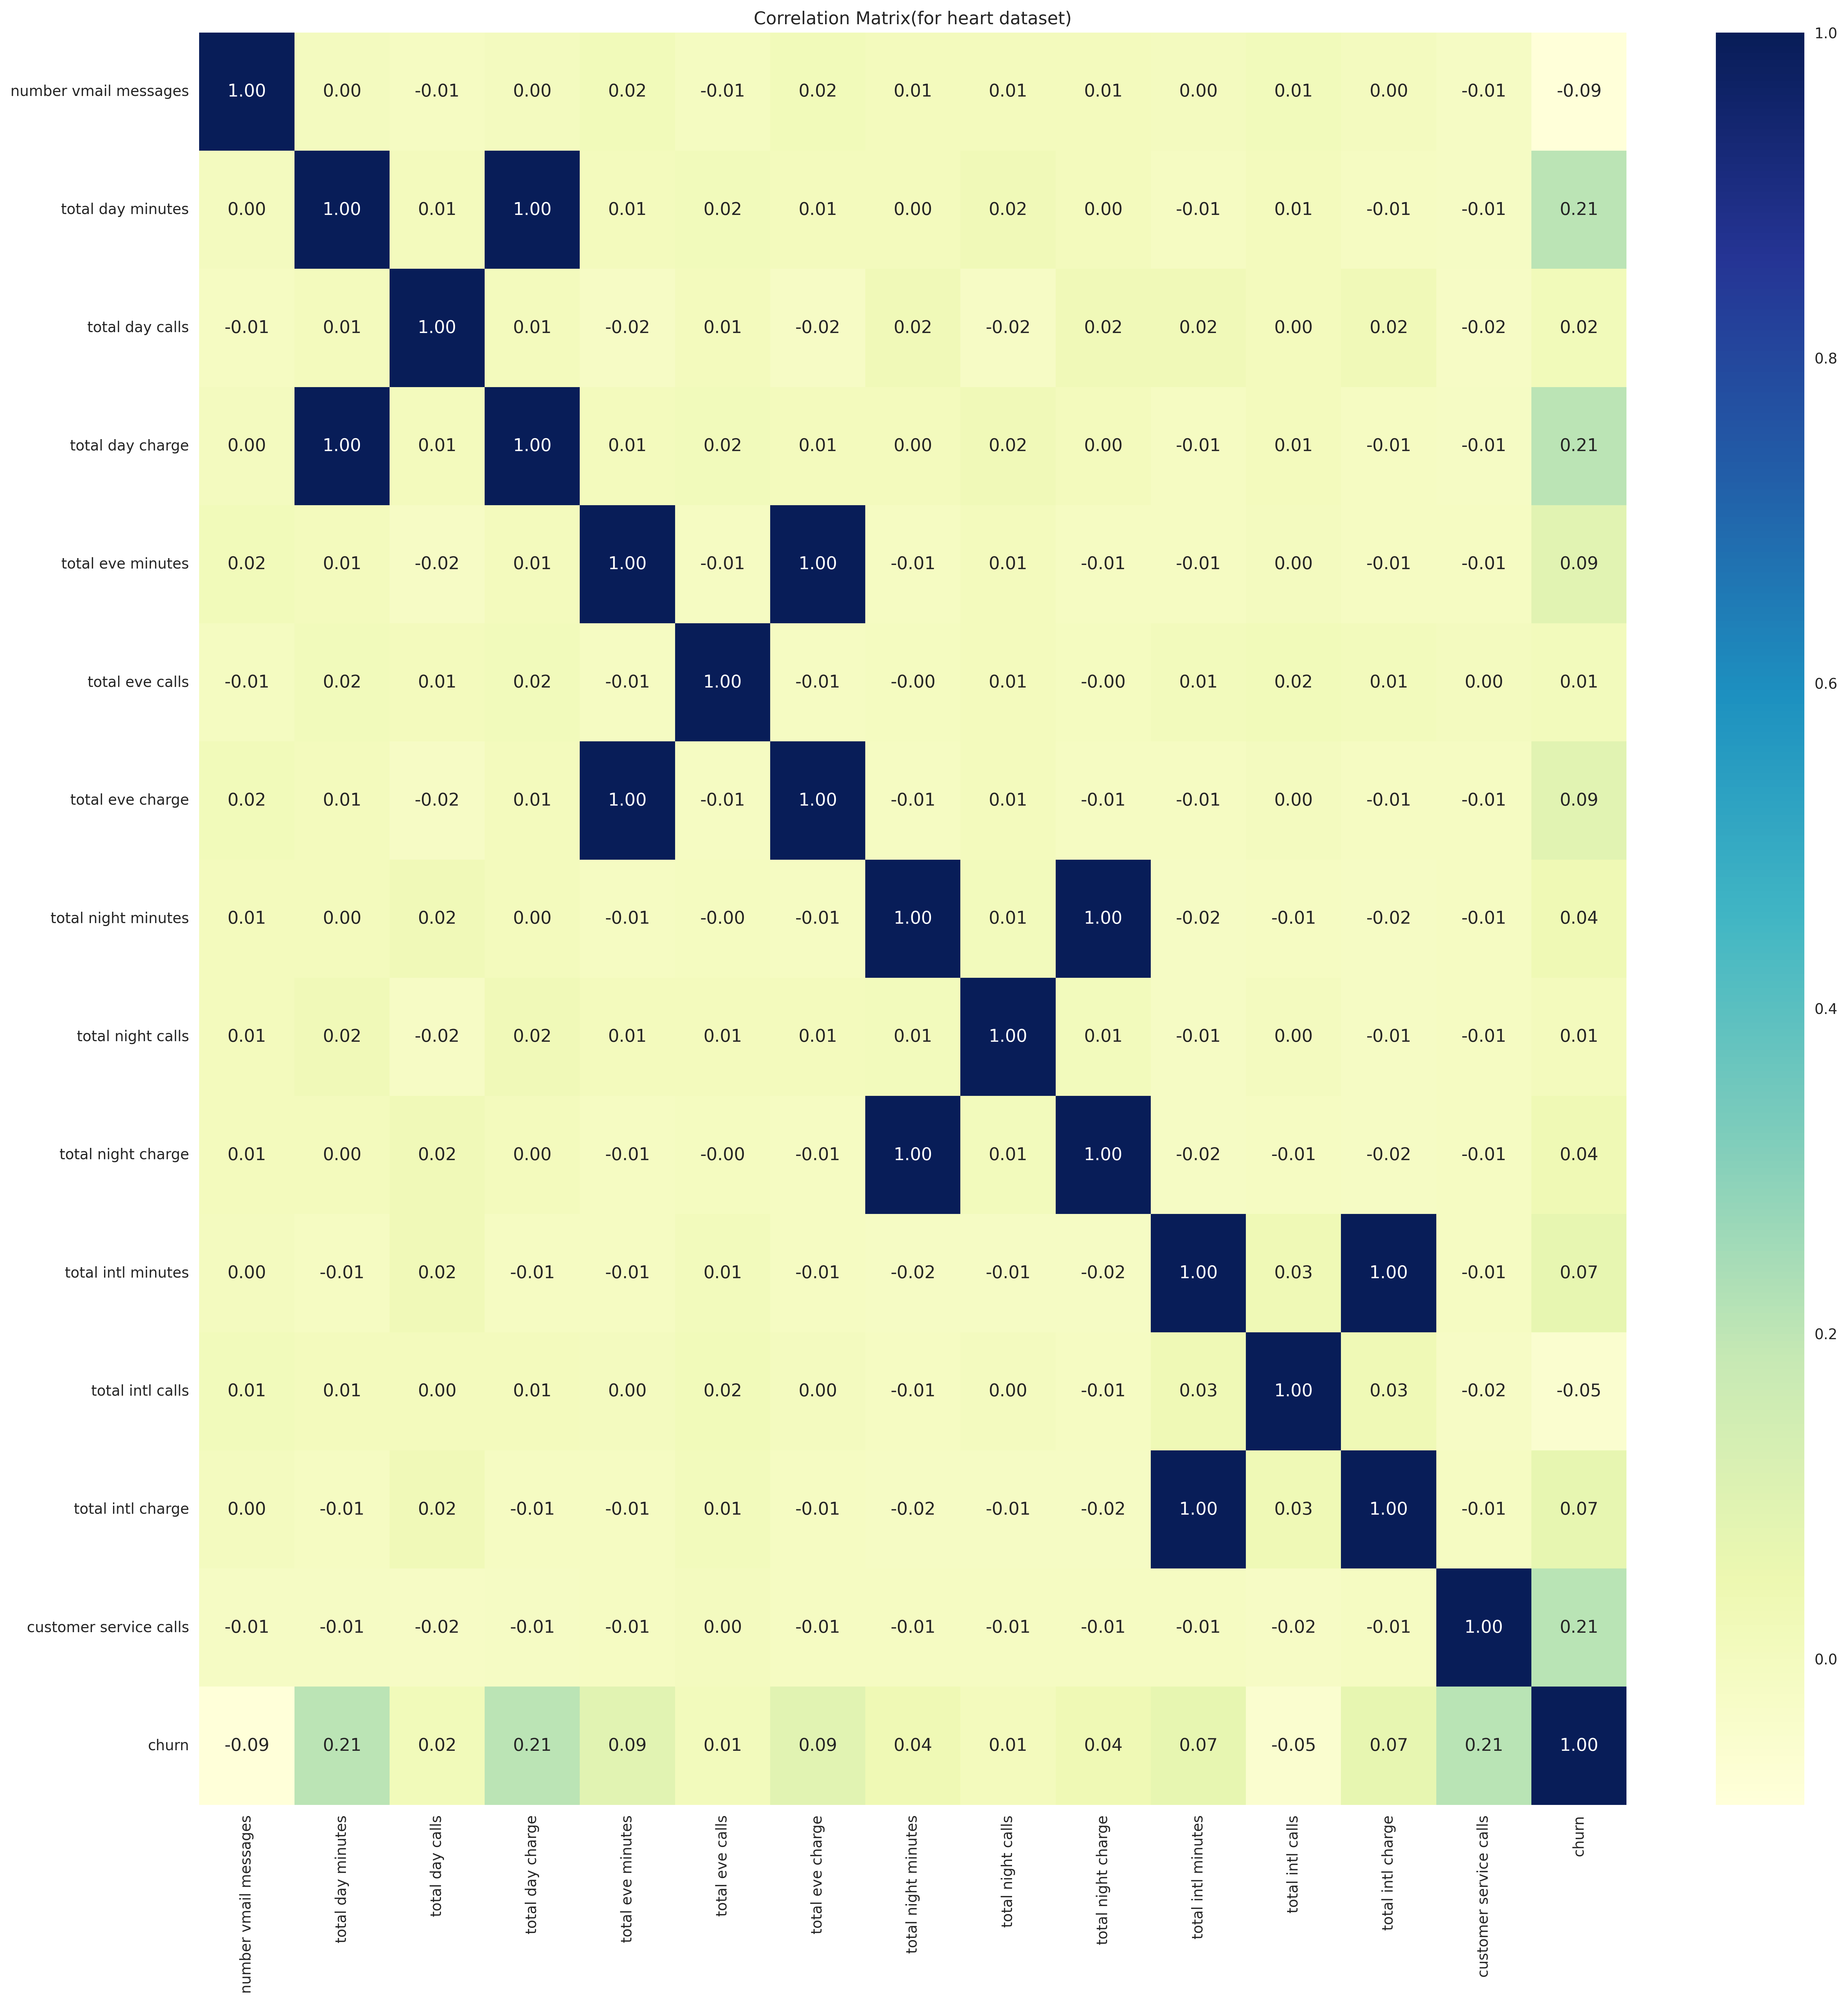

In [15]:
#Correlation for numeric
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu",fmt='.2f')
plt.title("Correlation Matrix(for heart dataset)")

In [16]:
# check using VIF 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif=df.select_dtypes(exclude="object")

def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "churn"
print(get_VIF(df_vif,target))


const                     1.376360e+02
number vmail messages     1.001814e+00
total day minutes         1.047381e+07
total day calls           1.003232e+00
total day charge          1.047382e+07
total eve minutes         2.236219e+06
total eve calls           1.001941e+00
total eve charge          2.236221e+06
total night minutes       6.387032e+05
total night calls         1.001980e+00
total night charge        6.387017e+05
total intl minutes        6.901318e+04
total intl calls          1.002794e+00
total intl charge         6.901383e+04
customer service calls    1.001807e+00
dtype: float64


In [17]:
#remove = ['total intl charge','total night charge','total eve charge','total day charge']
remove = ['total intl charge']
df.drop(columns=remove,inplace = True)
df.shape

(3333, 16)

In [18]:
# check using VIF 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif=df.select_dtypes(exclude="object")

def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "churn"
print(get_VIF(df_vif,target))


const                     1.376273e+02
number vmail messages     1.001765e+00
total day minutes         1.047340e+07
total day calls           1.002559e+00
total day charge          1.047341e+07
total eve minutes         2.236191e+06
total eve calls           1.001879e+00
total eve charge          2.236192e+06
total night minutes       6.386041e+05
total night calls         1.001935e+00
total night charge        6.386027e+05
total intl minutes        1.002529e+00
total intl calls          1.002470e+00
customer service calls    1.001739e+00
dtype: float64


In [19]:
#remove = ['total intl charge','total night charge','total eve charge','total day charge']
remove = ['total night charge']
df.drop(columns=remove,inplace = True)
df.shape

(3333, 15)

In [20]:
# check using VIF 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif=df.select_dtypes(exclude="object")

def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "churn"
print(get_VIF(df_vif,target))


const                     1.376273e+02
number vmail messages     1.001555e+00
total day minutes         1.046779e+07
total day calls           1.002474e+00
total day charge          1.046779e+07
total eve minutes         2.236075e+06
total eve calls           1.001019e+00
total eve charge          2.236076e+06
total night minutes       1.001543e+00
total night calls         1.001772e+00
total intl minutes        1.002492e+00
total intl calls          1.002092e+00
customer service calls    1.001681e+00
dtype: float64


# Correletion and EDA after removal of multicollinearity columns

Text(0.5, 1.0, 'Correlation Matrix(for heart dataset)')

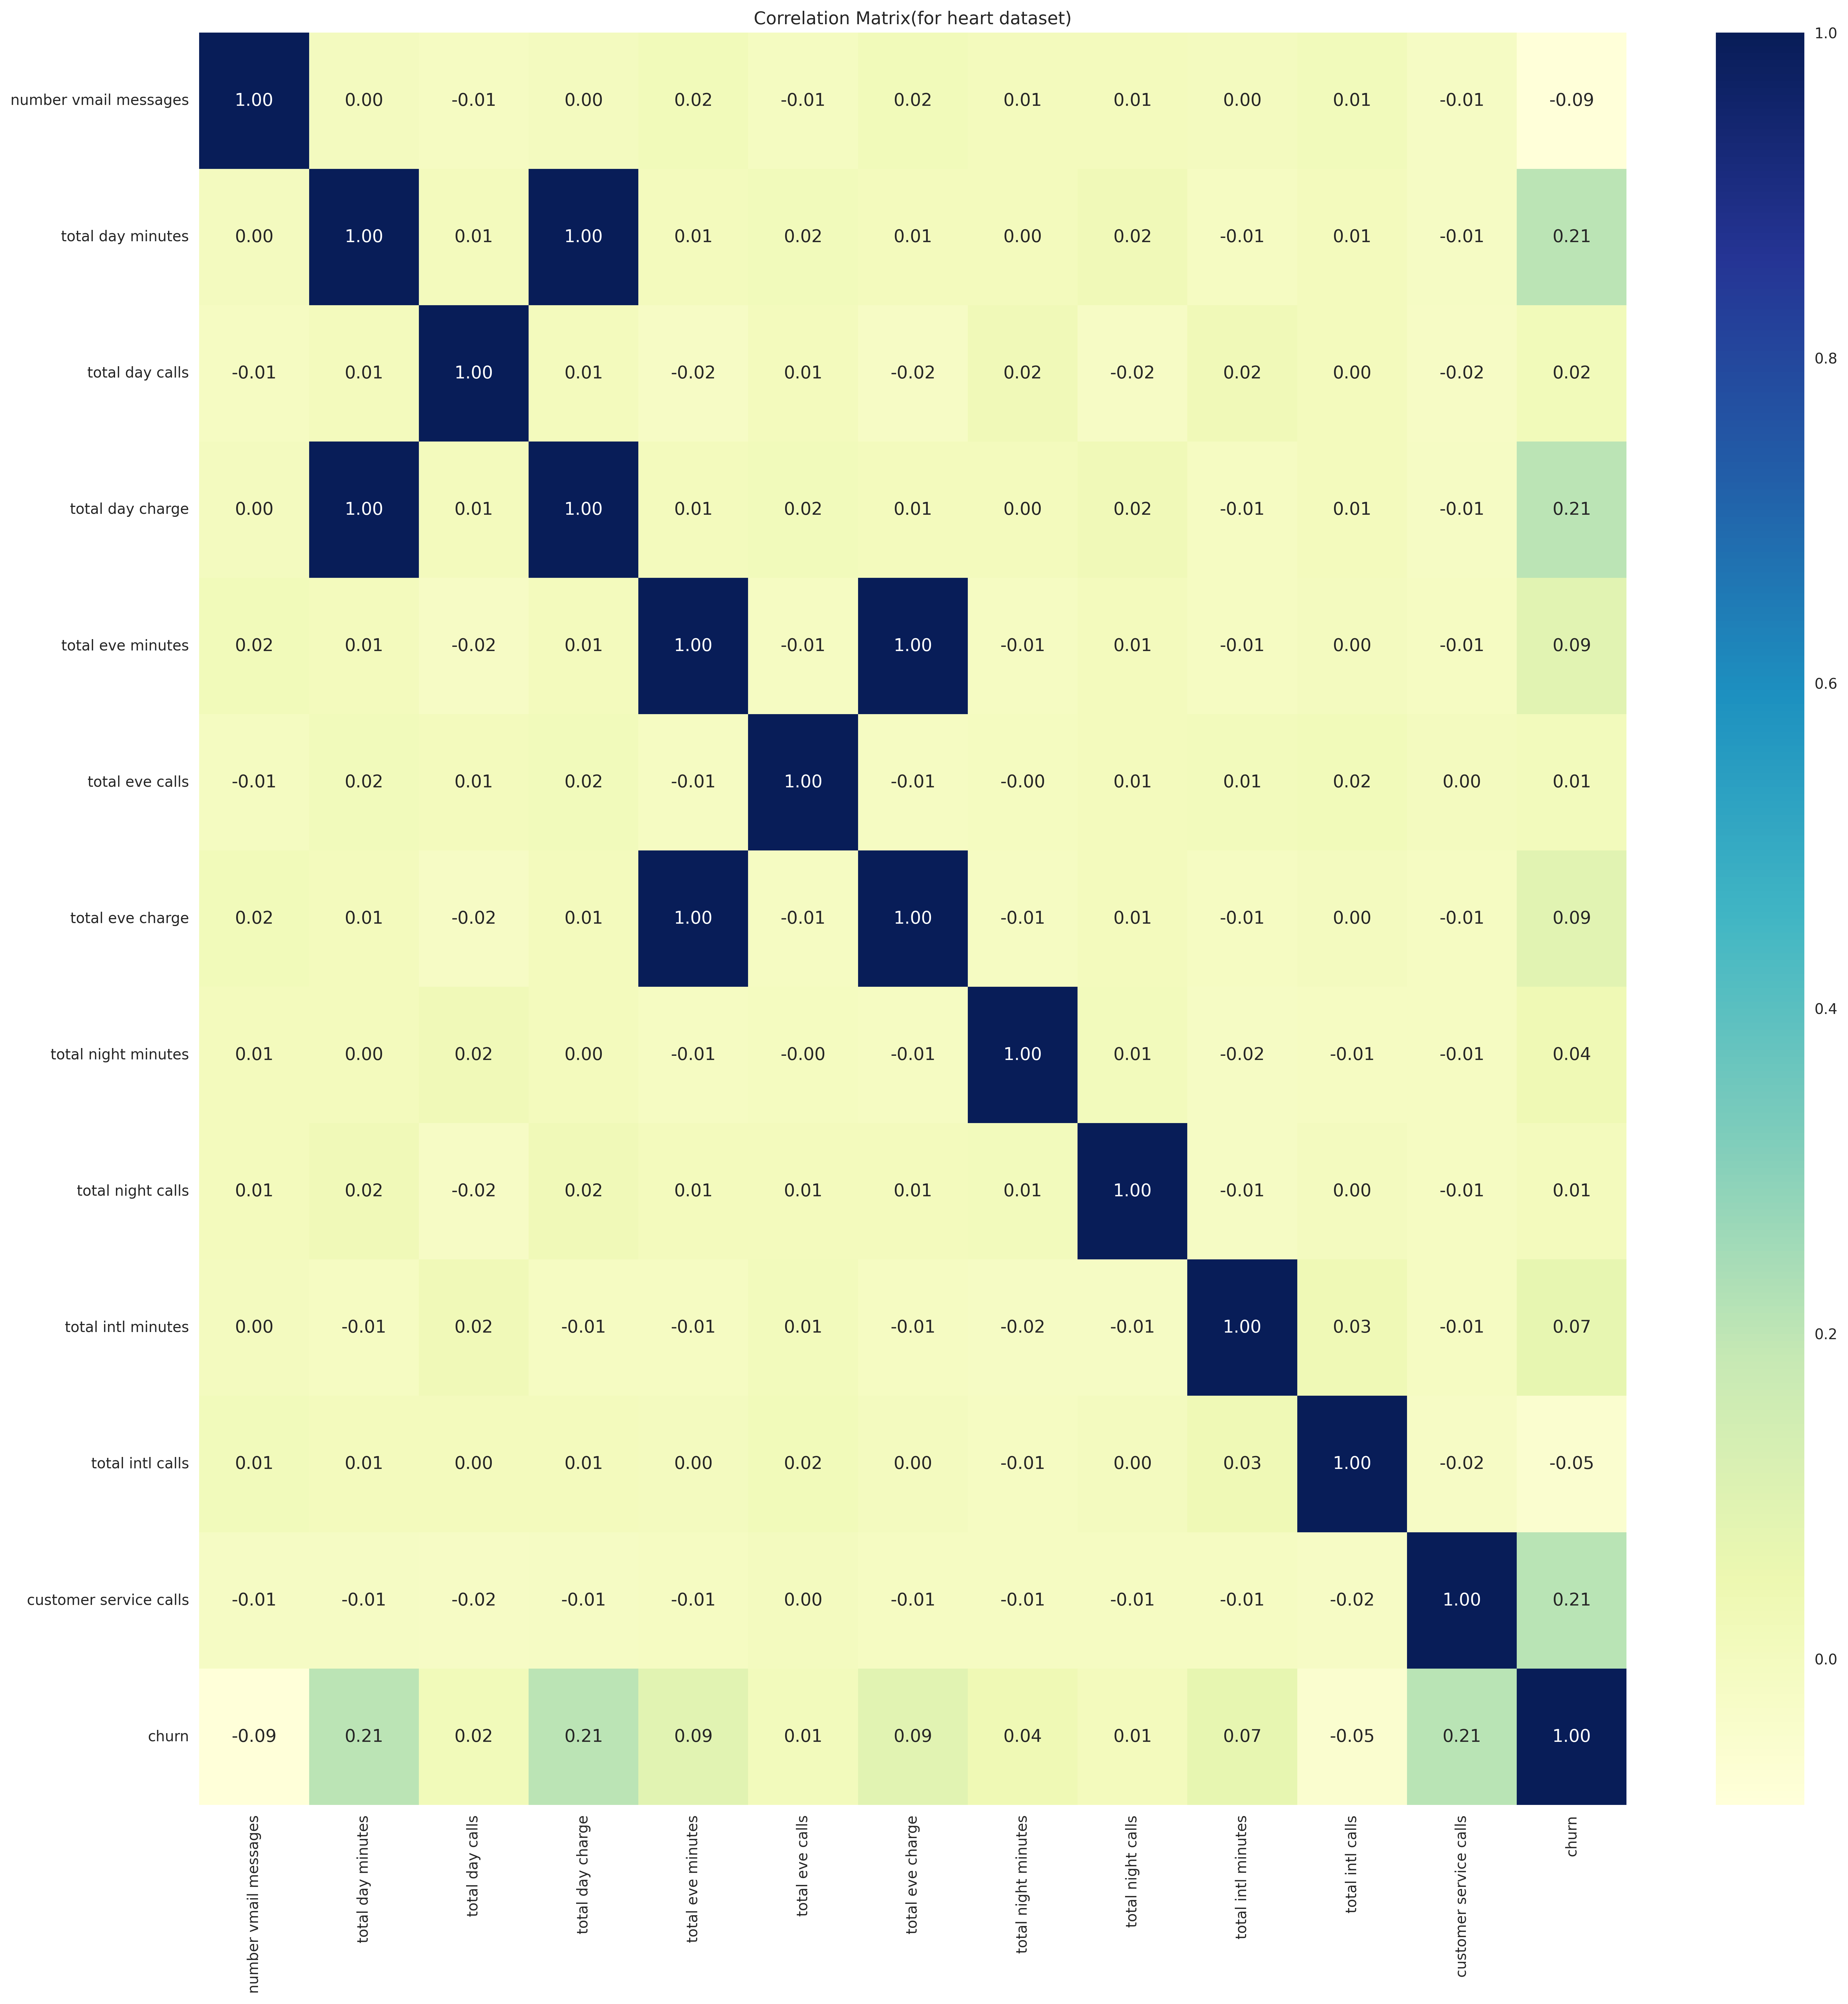

In [21]:
#Correlation for numeric
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu",fmt='.2f')
plt.title("Correlation Matrix(for heart dataset)")

In [22]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(3333, 13)

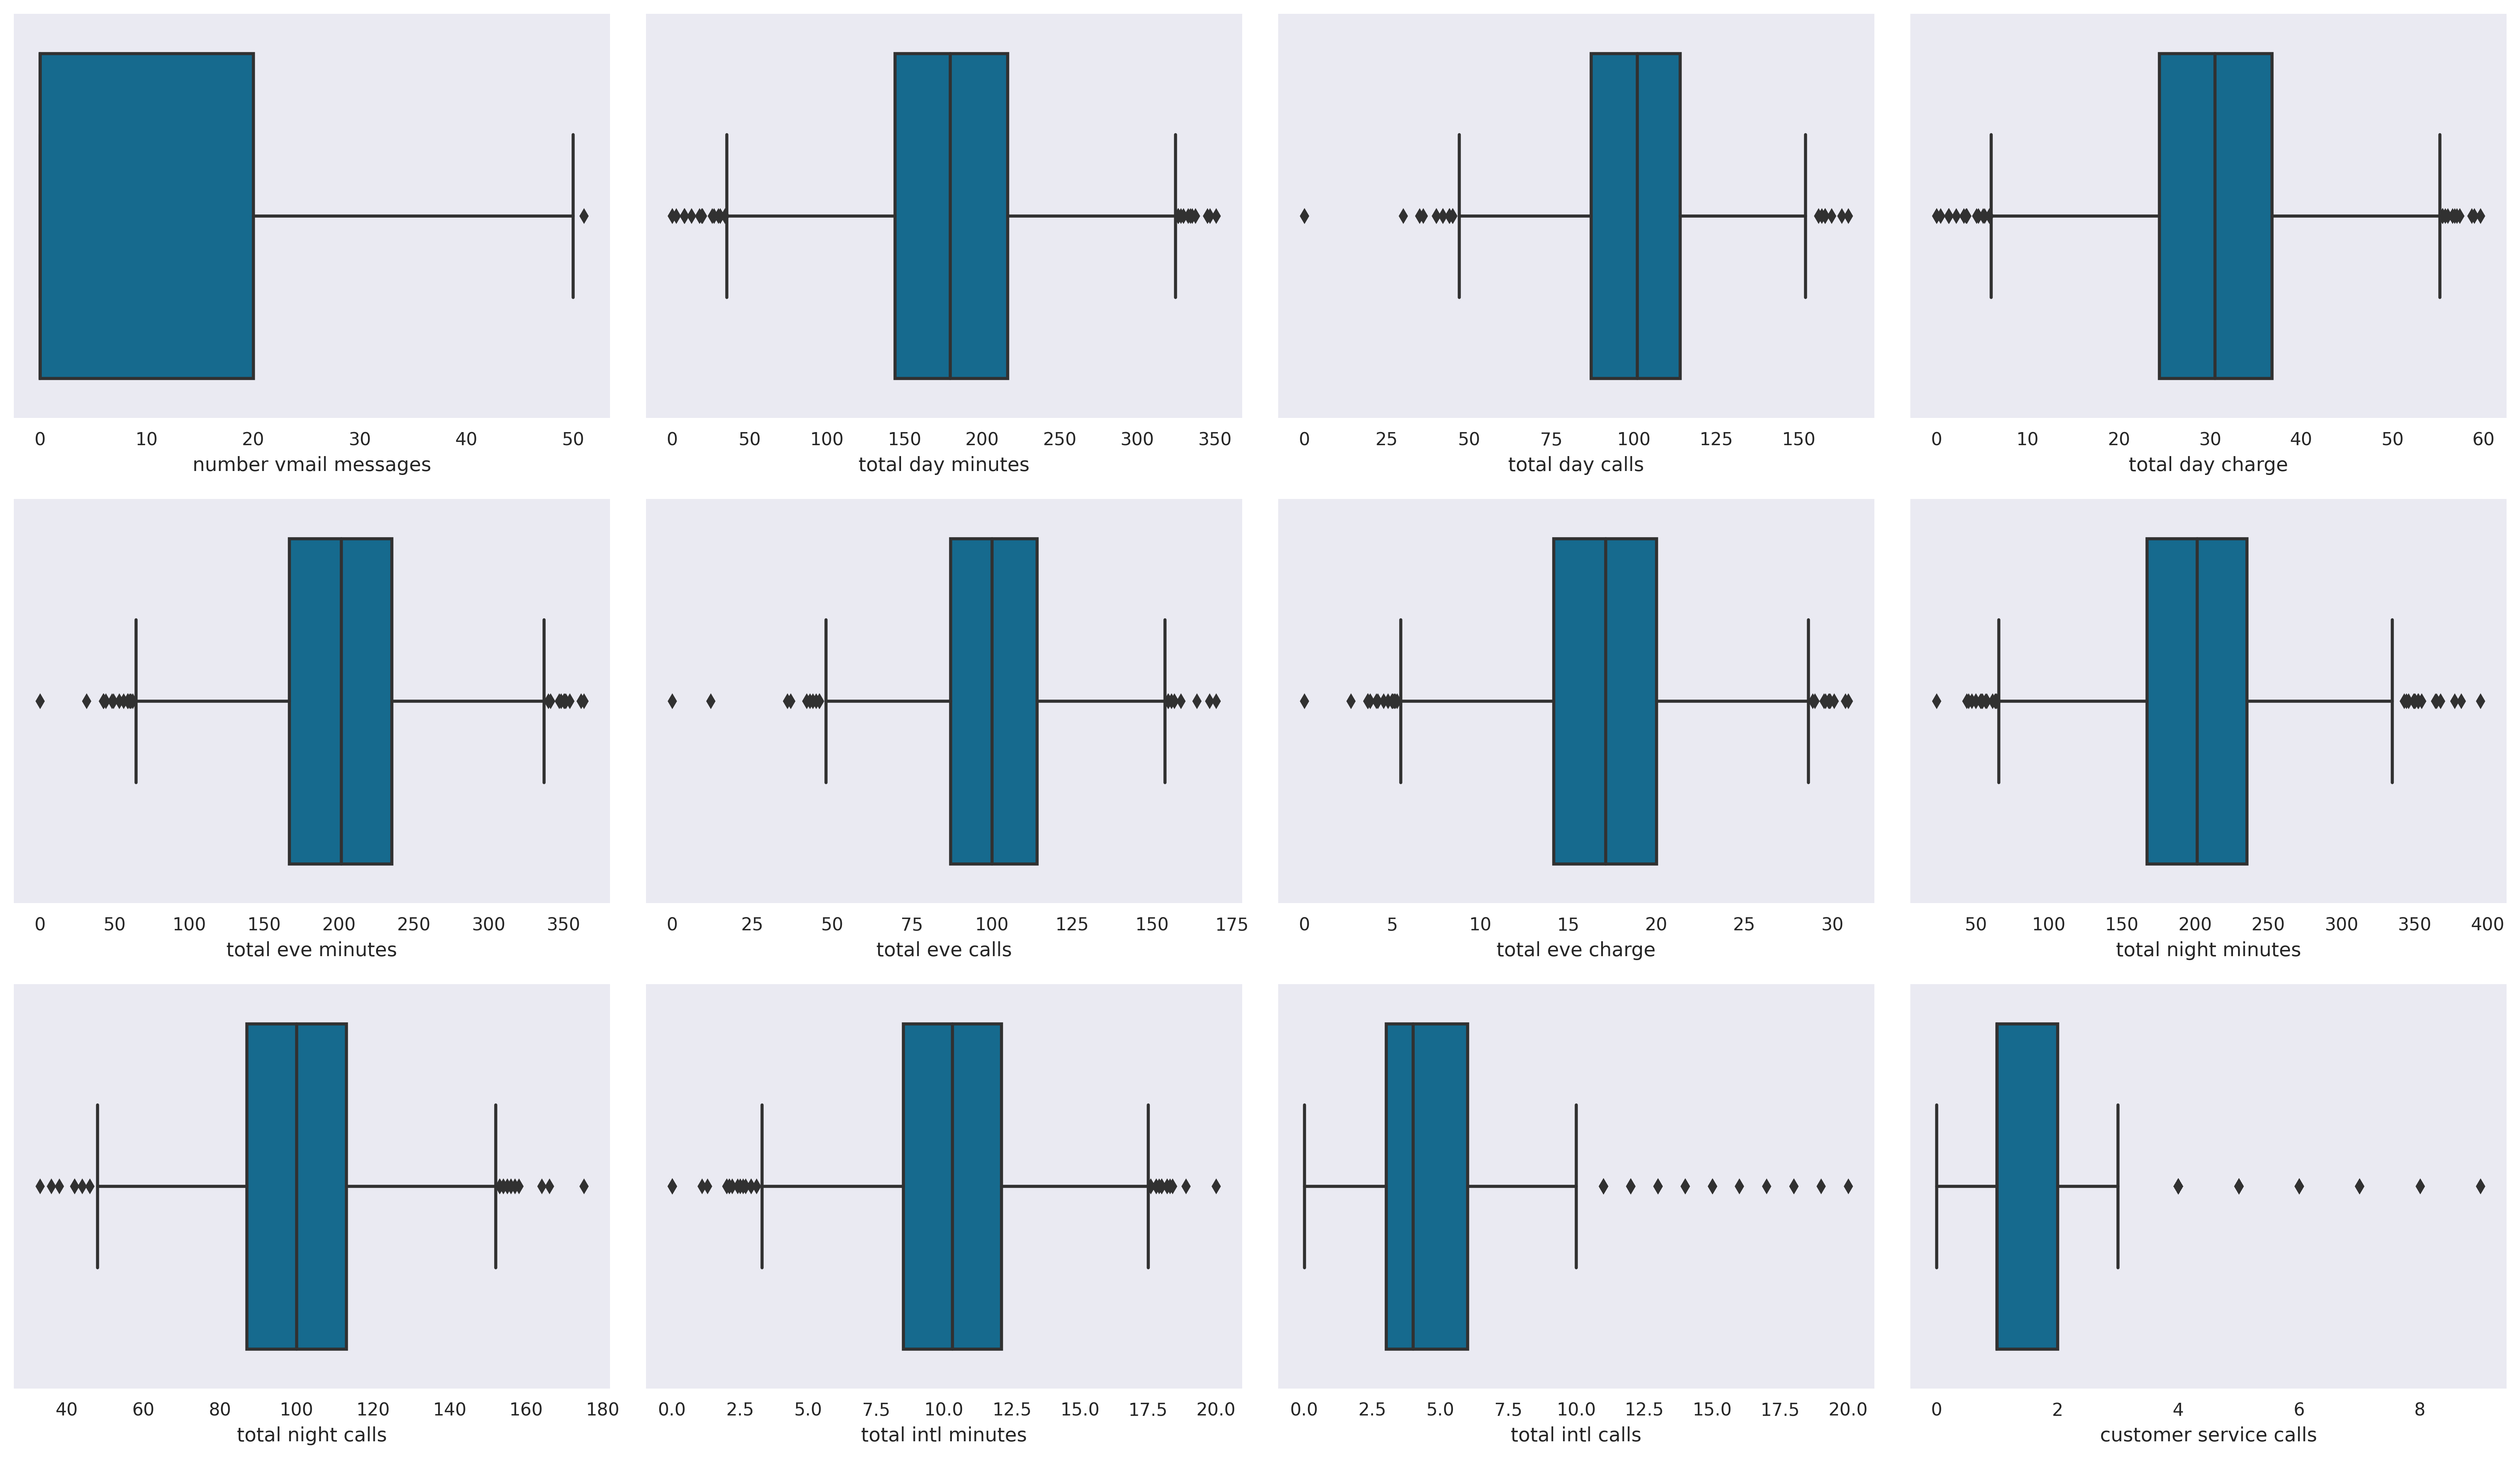

In [23]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 14:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


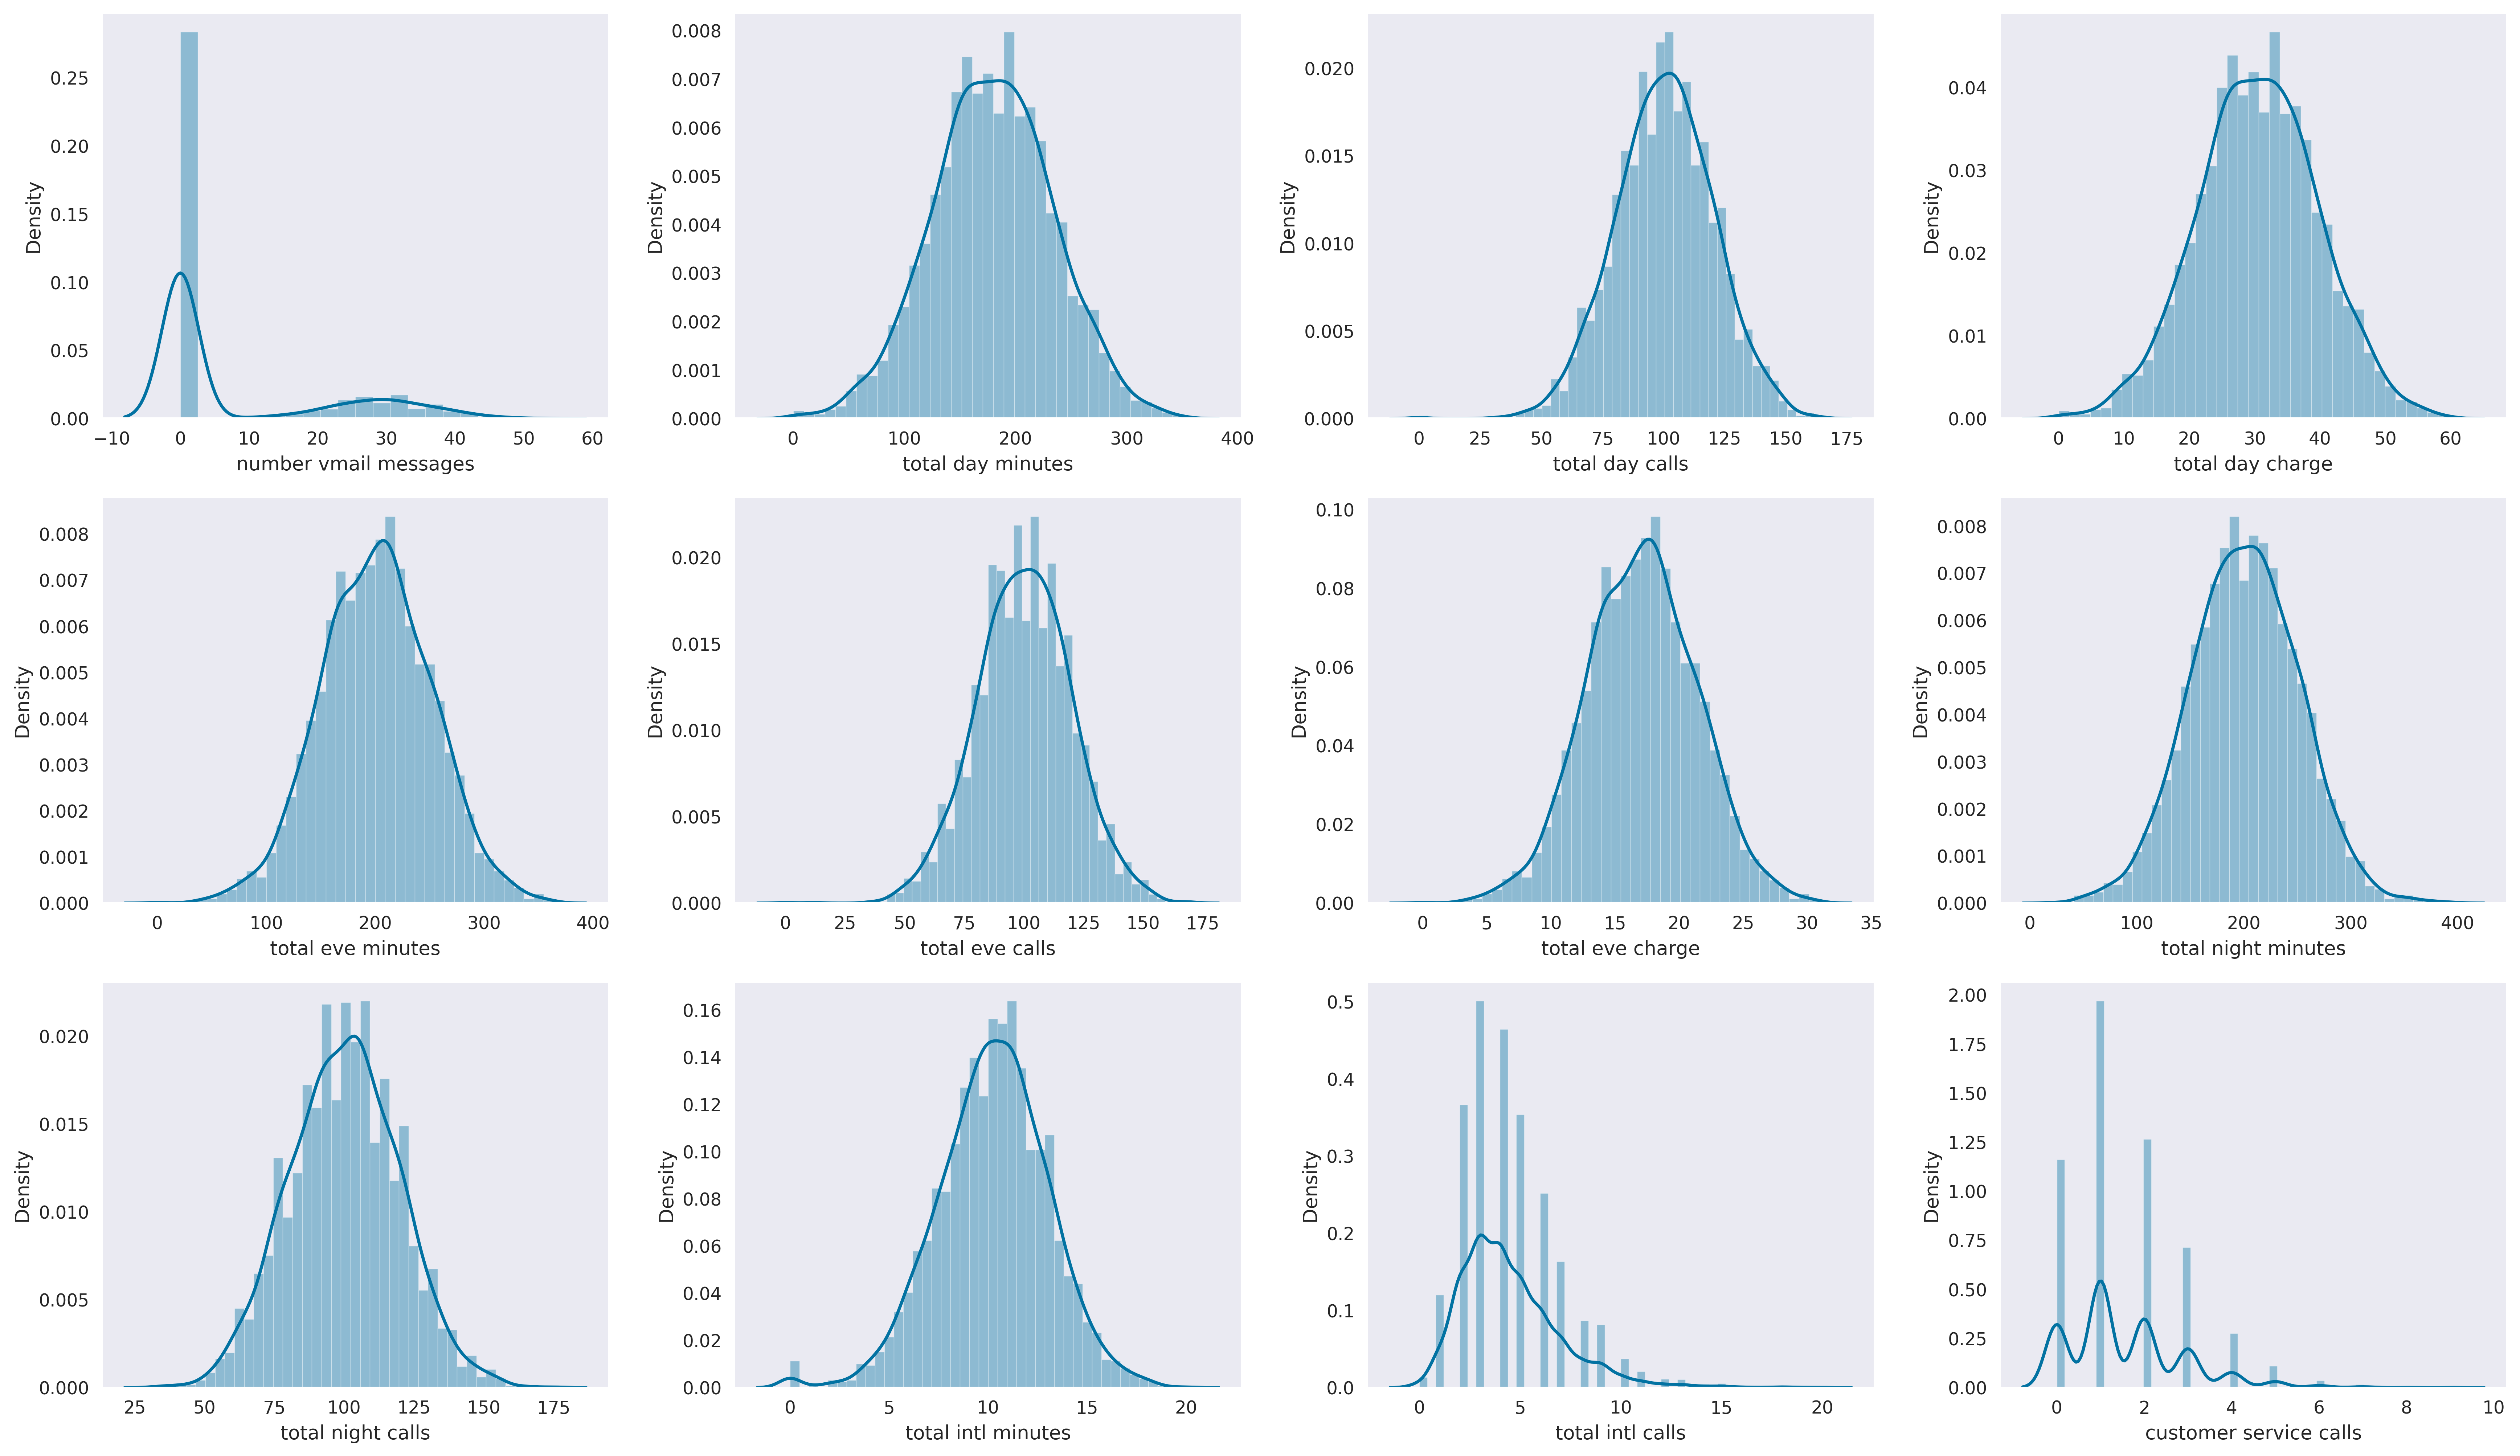

In [24]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 14:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()

# Anomaly

In [25]:
#set up environment final best result
history= setup(df,
                     silent=True,
                     normalize=True,
                     normalize_method='minmax',
                     transformation=True,
                     session_id=123)


In [26]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [27]:
lof = create_model('lof')


In [28]:
lof 

LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)

In [29]:
lof_assign = assign_model(lof)
lof_assign

international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total intl minutes  total intl calls  customer service calls  churn  Anomaly  Anomaly_Score
0                    no             yes                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91                10.0                 3                       1      0        0       0.982413
1                    no             yes                     26              161.6              123             27.47              195.5              103             16.62                254.4                103                13.7                 3                       1      0        0       1.004395
2                    no              no                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                12.2                 5                       0      0        0       1.026856
3                   yes              no                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                 6.6                 7                       2      0        1       1.436281
4                   yes              no                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                10.1                 3                       3      0        0       1.104085
...                 ...             ...                    ...                ...              ...               ...                ...              ...               ...                  ...                ...                 ...               ...                     ...    ...      ...            ...
3328                 no             yes                     36              156.2               77             26.55              215.5              126             18.32                279.1                 83                 9.9                 6                       2      0        0       1.025527
3329                 no              no                      0              231.1               57             39.29              153.4               55             13.04                191.3                123                 9.6                 4                       3      0        0       1.182217
3330                 no              no                      0              180.8              109             30.74              288.8               58             24.55                191.9                 91                14.1                 6                       2      0        0       1.060089
3331                yes              no                      0              213.8              105             36.35              159.6               84             13.57                139.2                137                 5.0                10                       2      0        1       1.284723
3332                 no             yes                     25              234.4              113             39.85              265.9               82             22.60                241.4                 77                13.7                 4                       0      0        0       1.046139

[3333 rows x 17 columns]

In [30]:
lof_assign[lof_assign['Anomaly'] ==1]

international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total intl minutes  total intl calls  customer service calls  churn  Anomaly  Anomaly_Score
3                   yes              no                      0              299.4               71             50.90               61.9               88              5.26                196.9                 89                 6.6                 7                       2      0        1       1.436281
15                   no              no                      0              332.9               67             56.59              317.8               97             27.01                160.6                128                 5.4                 9                       4      1        1       1.432785
21                   no              no                      0               62.4               89             10.61              169.9              121             14.44                209.6                 64                 5.7                 6                       5      1        1       1.290828
22                   no              no                      0              183.0              112             31.11               72.9               99              6.20                181.8                 78                 9.5                19                       0      0        1       1.298765
30                   no              no                      0               84.8               95             14.42              136.7               63             11.62                250.5                148                14.2                 6                       2      0        1       1.342294
...                 ...             ...                    ...                ...              ...               ...                ...              ...               ...                  ...                ...                 ...               ...                     ...    ...      ...            ...
3275                 no             yes                     27              128.5              115             21.85              163.7               91             13.91                242.9                121                 0.0                 0                       1      0        1       1.348913
3280                 no              no                      0              107.3              140             18.24              238.2              133             20.25                271.8                116                10.0                 3                       4      1        1       1.295841
3290                 no              no                      0              107.9              128             18.34              187.0               77             15.90                218.5                 95                 0.0                 0                       0      0        1       1.326508
3291                yes             yes                     22              172.1              119             29.26              223.6              133             19.01                150.0                 94                13.9                20                       1      1        1       1.303515
3331                yes              no                      0              213.8              105             36.35              159.6               84             13.57                139.2                137                 5.0                10                       2      0        1       1.284723

[167 rows x 17 columns]

In [31]:
df = lof_assign[lof_assign['Anomaly'] ==0]
df.drop(columns = ['Anomaly','Anomaly_Score'],inplace = True)
df

international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total intl minutes  total intl calls  customer service calls  churn
0                    no             yes                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91                10.0                 3                       1      0
1                    no             yes                     26              161.6              123             27.47              195.5              103             16.62                254.4                103                13.7                 3                       1      0
2                    no              no                      0              243.4              114             41.38              121.2              110             10.30                162.6                104                12.2                 5                       0      0
4                   yes              no                      0              166.7              113             28.34              148.3              122             12.61                186.9                121                10.1                 3                       3      0
5                   yes              no                      0              223.4               98             37.98              220.6              101             18.75                203.9                118                 6.3                 6                       0      0
...                 ...             ...                    ...                ...              ...               ...                ...              ...               ...                  ...                ...                 ...               ...                     ...    ...
3327                 no              no                      0              134.7               98             22.90              189.7               68             16.12                221.4                128                11.8                 5                       2      0
3328                 no             yes                     36              156.2               77             26.55              215.5              126             18.32                279.1                 83                 9.9                 6                       2      0
3329                 no              no                      0              231.1               57             39.29              153.4               55             13.04                191.3                123                 9.6                 4                       3      0
3330                 no              no                      0              180.8              109             30.74              288.8               58             24.55                191.9                 91                14.1                 6                       2      0
3332                 no             yes                     25              234.4              113             39.85              265.9               82             22.60                241.4                 77                13.7                 4                       0      0

[3166 rows x 15 columns]

# Correlation/EDA and VIF after removal of Anomaly

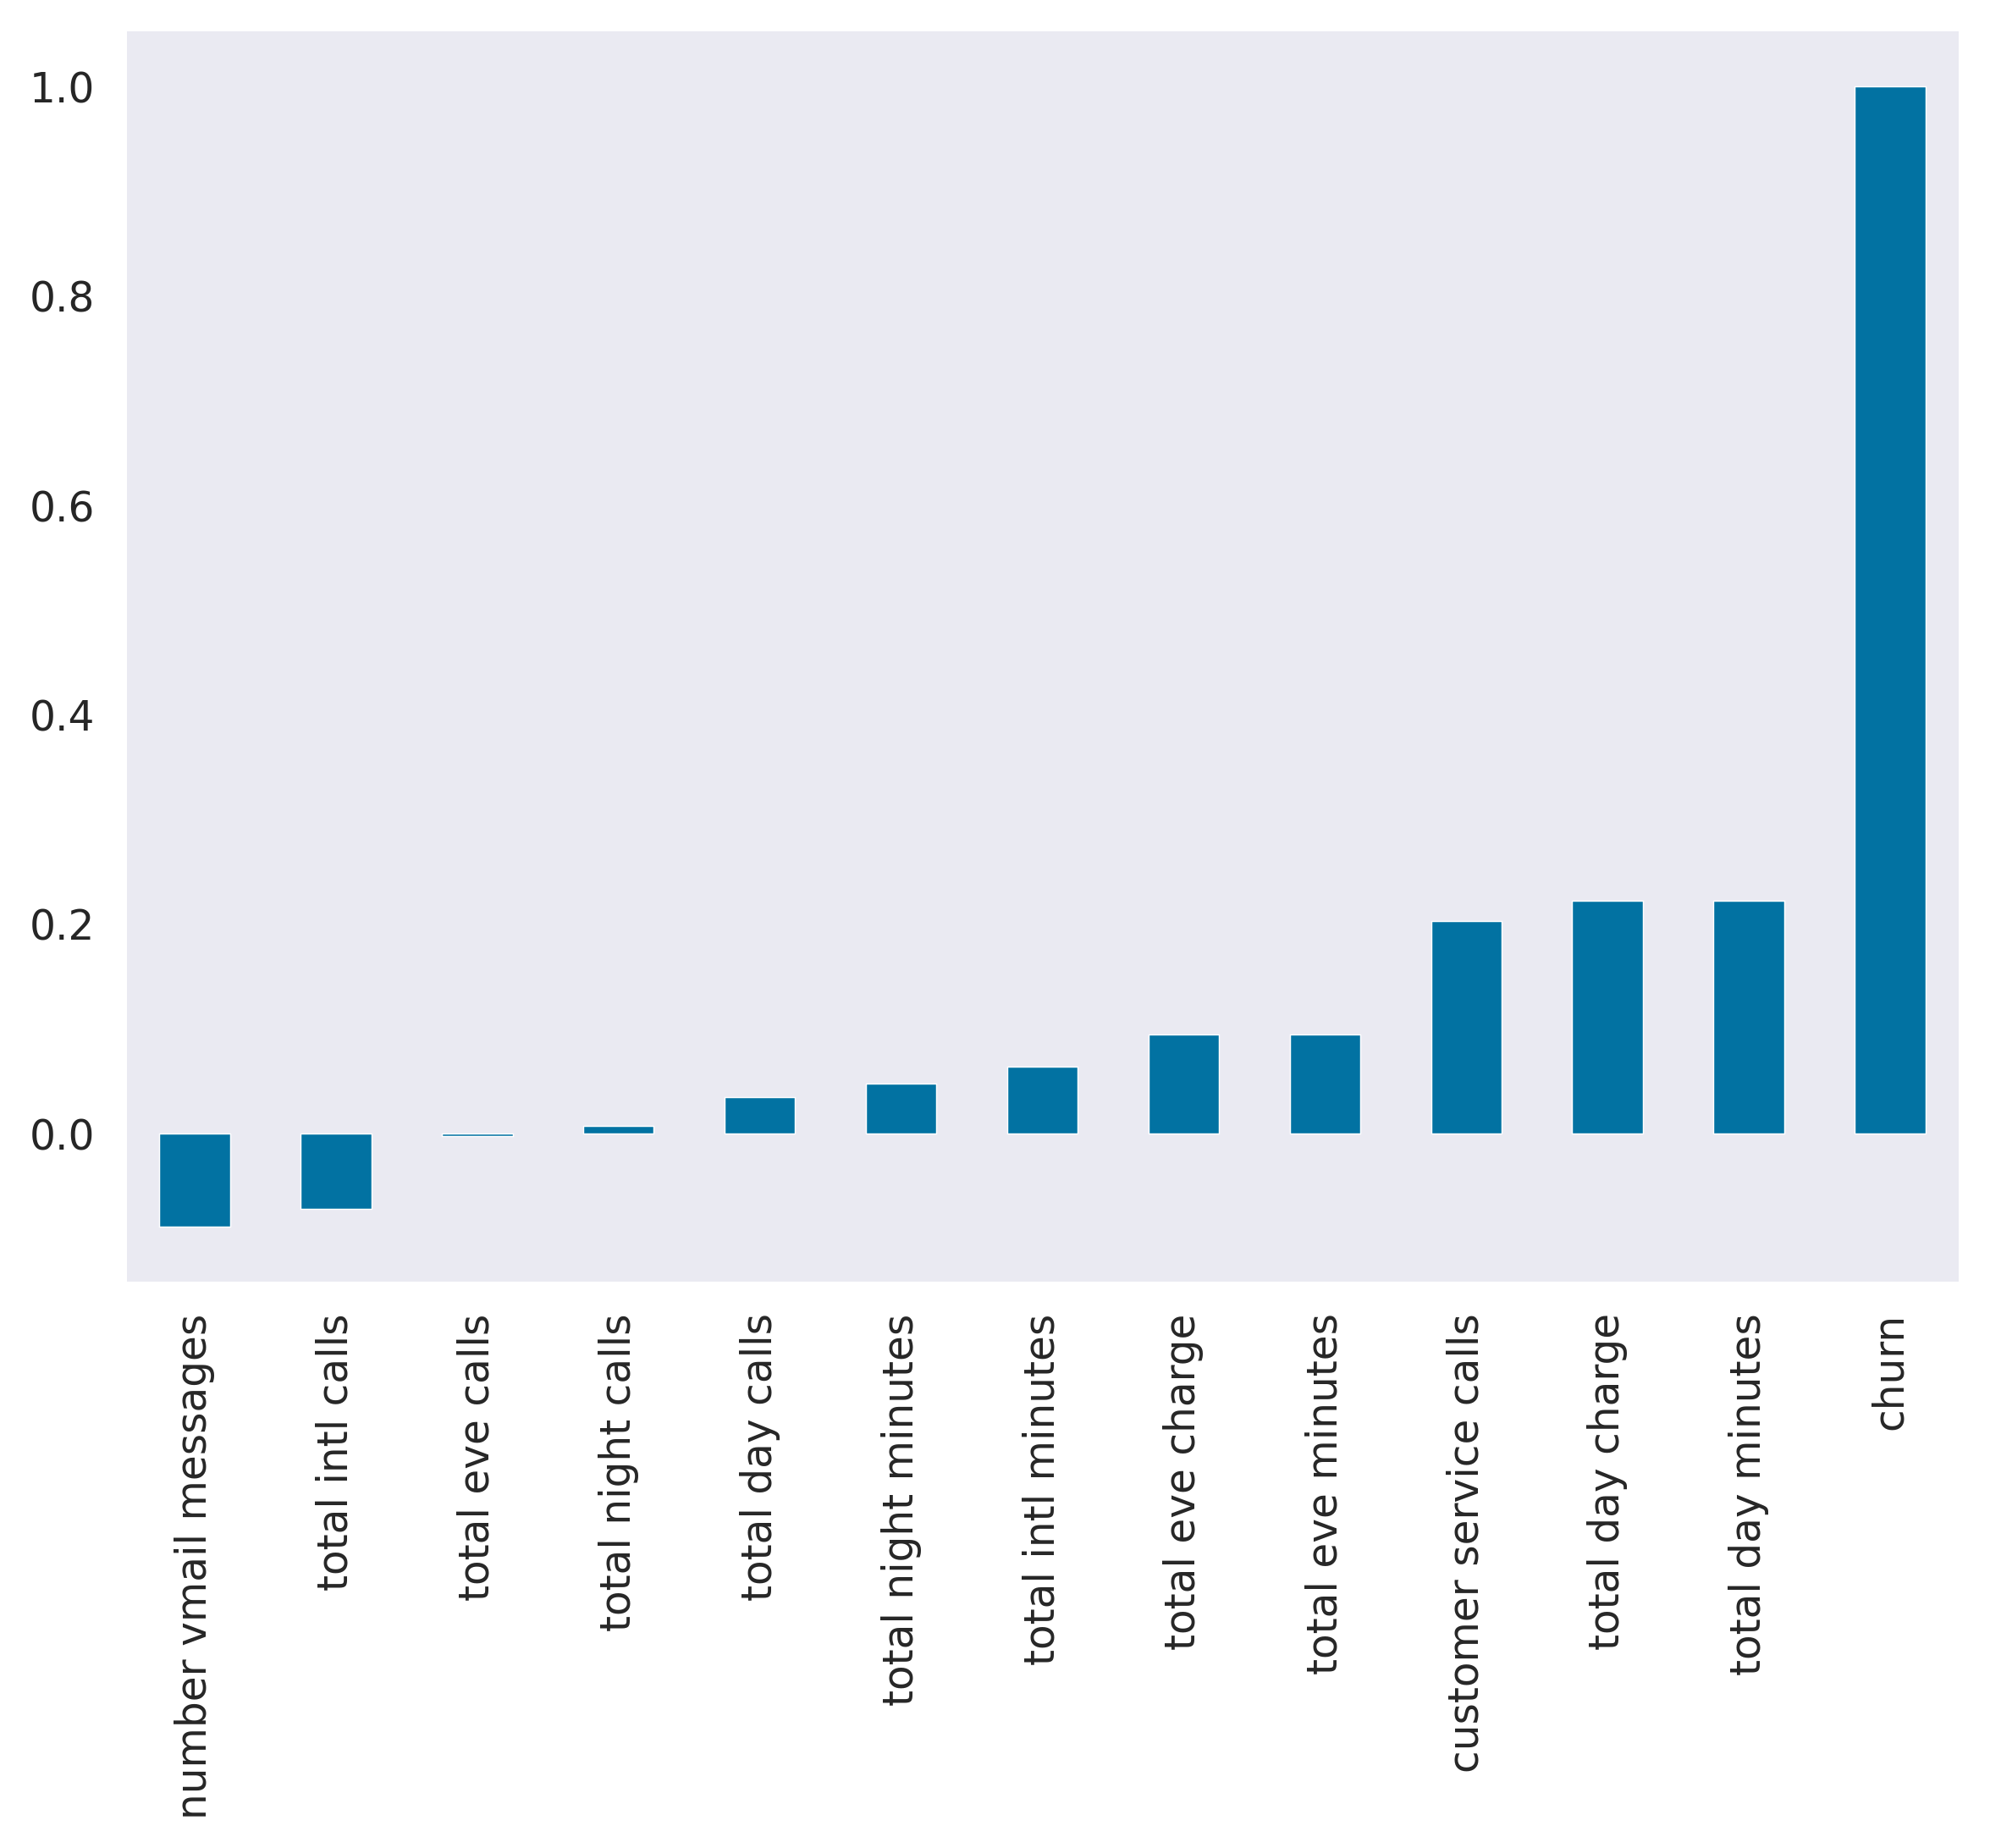

In [32]:
# plot correlation
df.corr()['churn'].sort_values().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix(for heart dataset)')

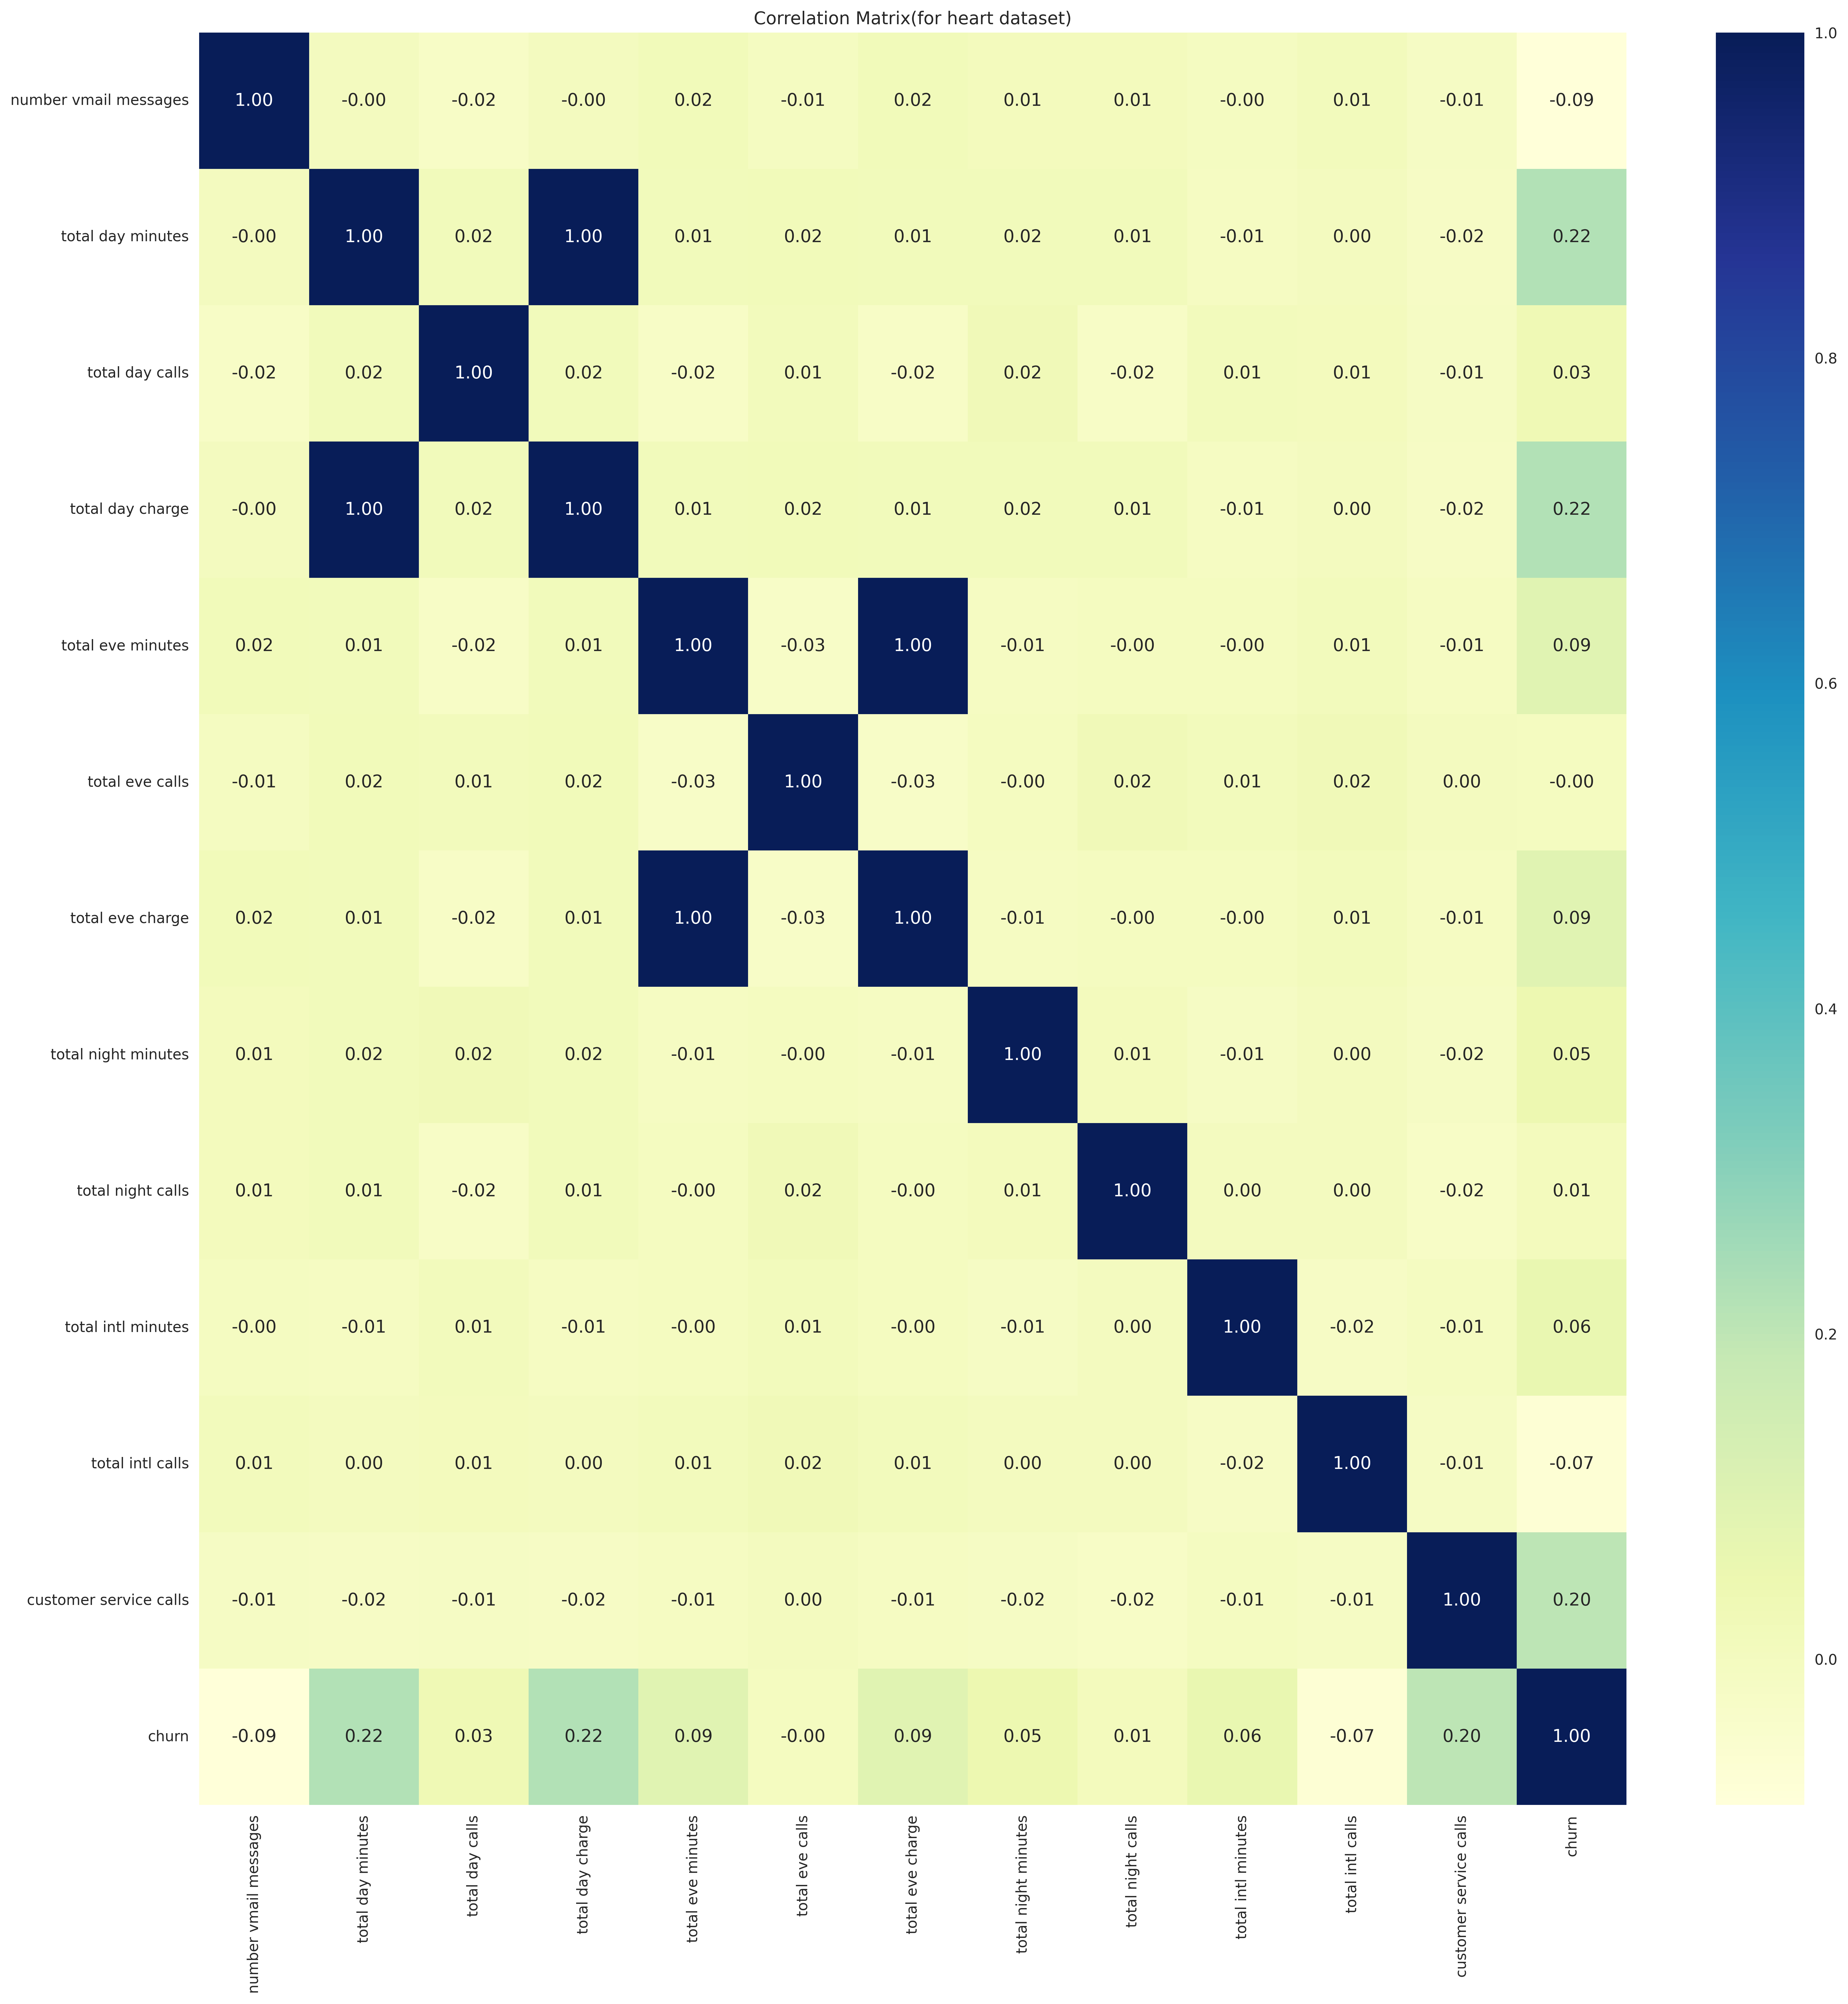

In [33]:
#Correlation for numeric
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu",fmt='.2f')
plt.title("Correlation Matrix(for heart dataset)")

In [34]:
# check using VIF 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif=df.select_dtypes(exclude="object")

def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "churn"
print(get_VIF(df_vif,target))


const                     1.476754e+02
number vmail messages     1.002125e+00
total day minutes         9.886949e+06
total day calls           1.003014e+00
total day charge          9.886953e+06
total eve minutes         2.076973e+06
total eve calls           1.002495e+00
total eve charge          2.076973e+06
total night minutes       1.001531e+00
total night calls         1.002220e+00
total intl minutes        1.001105e+00
total intl calls          1.001362e+00
customer service calls    1.002090e+00
dtype: float64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3166 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3166 non-null   object 
 1   voice mail plan         3166 non-null   object 
 2   number vmail messages   3166 non-null   int64  
 3   total day minutes       3166 non-null   float64
 4   total day calls         3166 non-null   int64  
 5   total day charge        3166 non-null   float64
 6   total eve minutes       3166 non-null   float64
 7   total eve calls         3166 non-null   int64  
 8   total eve charge        3166 non-null   float64
 9   total night minutes     3166 non-null   float64
 10  total night calls       3166 non-null   int64  
 11  total intl minutes      3166 non-null   float64
 12  total intl calls        3166 non-null   int64  
 13  customer service calls  3166 non-null   int64  
 14  churn                   3166 non-null   

In [36]:
df.shape

(3166, 15)

In [37]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(3166, 13)

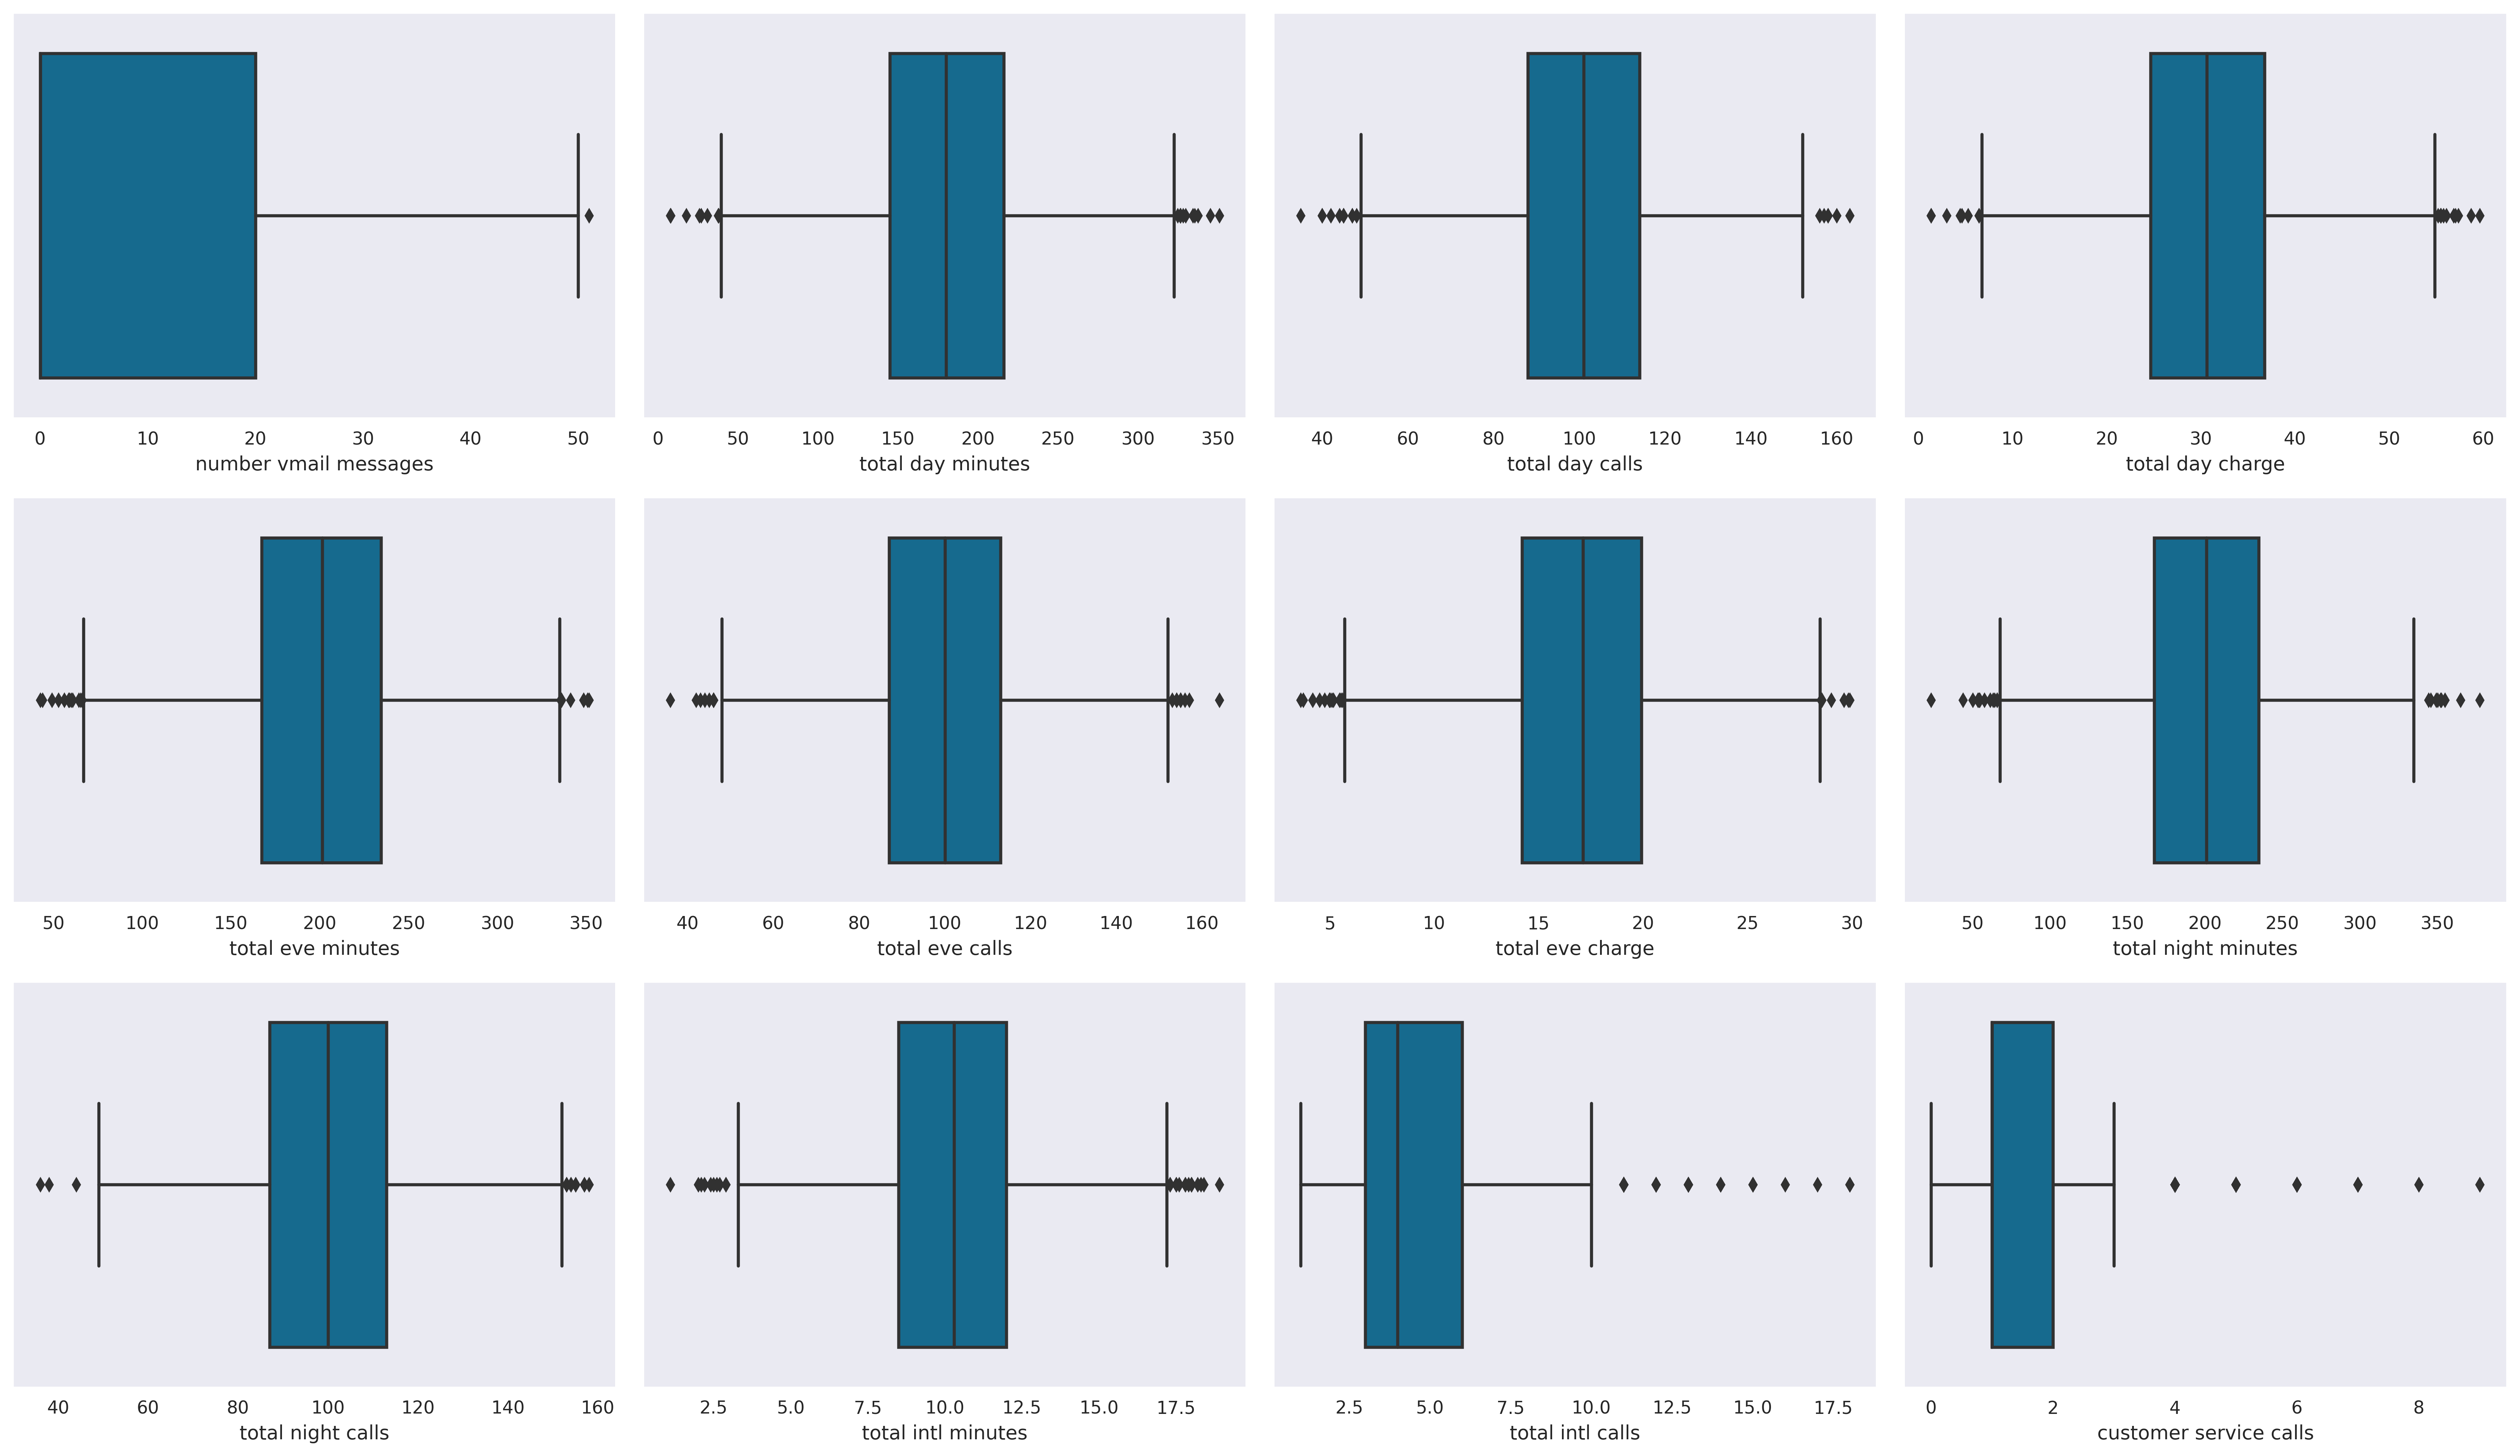

In [38]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 14:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


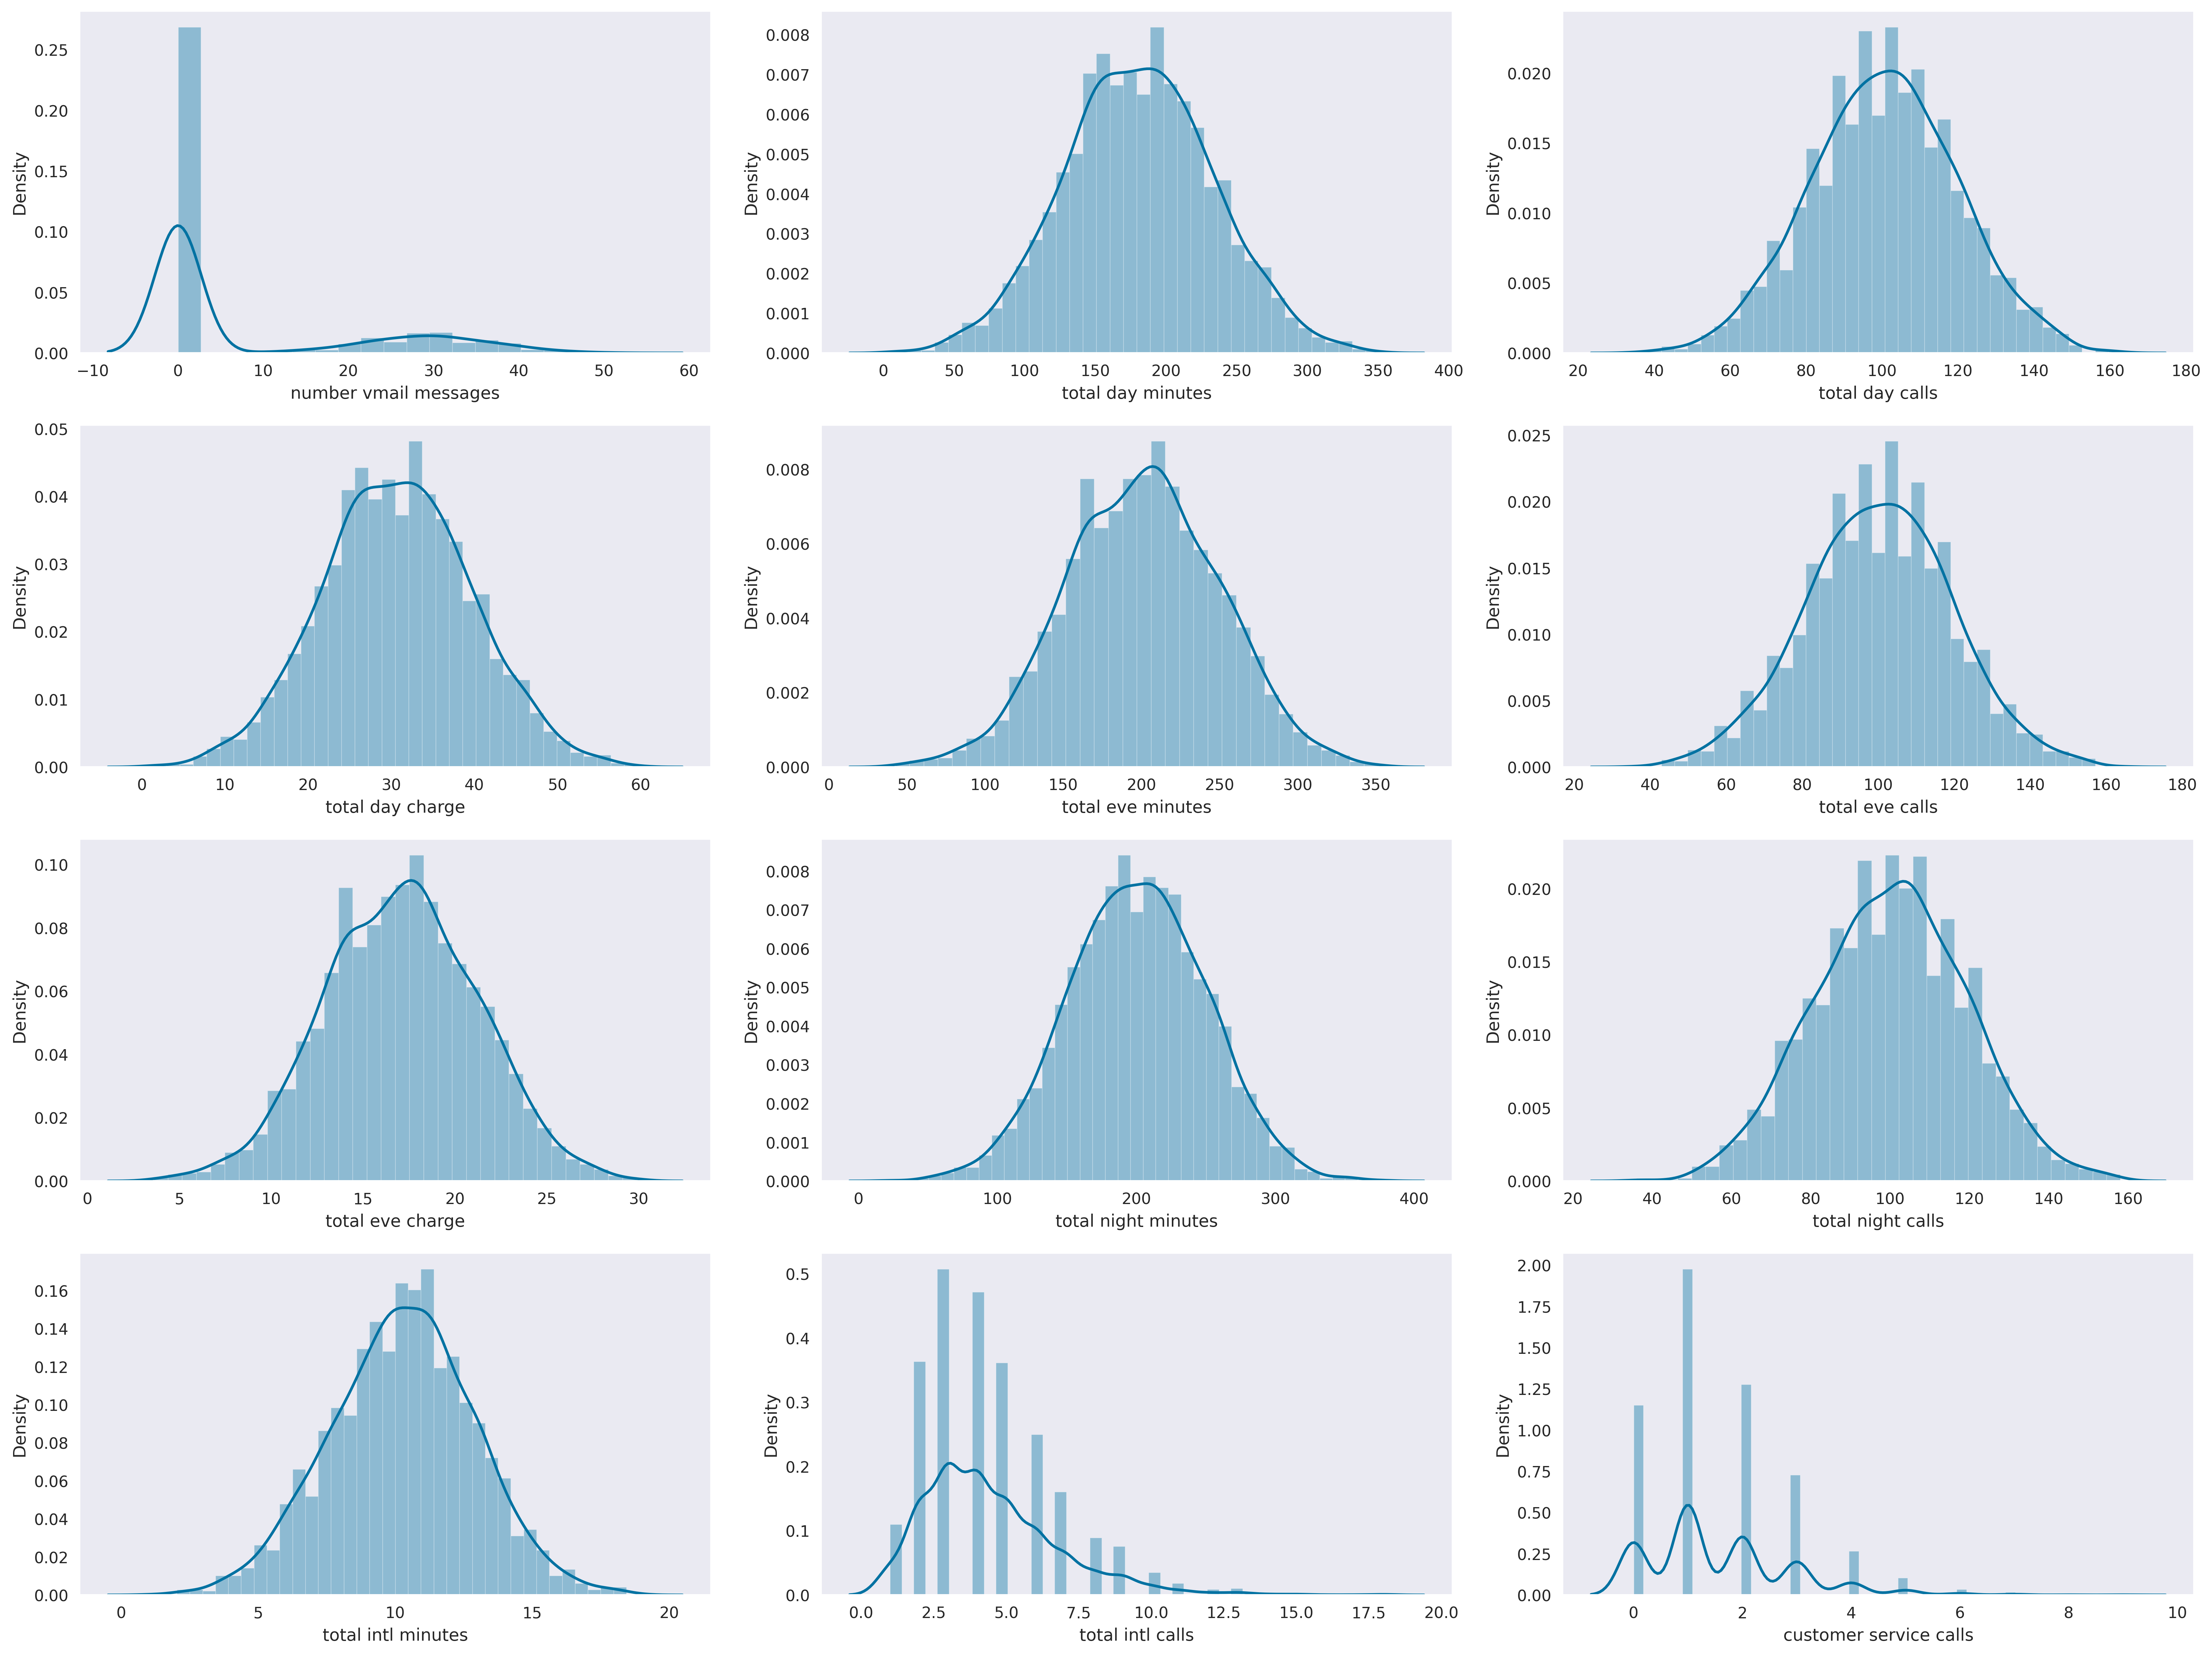

In [39]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,15))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 14:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()

In [40]:
df['churn'].value_counts()

0    2737
1     429
Name: churn, dtype: int64

In [41]:
df['churn'].value_counts(normalize=True)*100

0    86.449779
1    13.550221
Name: churn, dtype: float64

In [42]:
data ,unseen = train_test_split(df,test_size=0.05, random_state=768,stratify = df['churn'])

In [43]:
data.shape,unseen.shape

((3007, 15), (159, 15))

In [44]:
data['churn'].value_counts()

0    2600
1     407
Name: churn, dtype: int64

In [45]:
data['churn'].value_counts(normalize=True)*100

0    86.464915
1    13.535085
Name: churn, dtype: float64

In [46]:
unseen['churn'].value_counts()

0    137
1     22
Name: churn, dtype: int64

In [47]:
unseen['churn'].value_counts(normalize=True)*100

0    86.163522
1    13.836478
Name: churn, dtype: float64

In [48]:
from pycaret.classification import *

In [ ]:
#set up environment
history = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     transformation=True,
                     fold = 5,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='F2',exclude = ['catboost'])

# Class weight ,Neural Network & ETC

In [ ]:
#from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import stochastic_gradient
from sklearn.neural_network import MLPClassifier

In [ ]:
#set up environment
history1 = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     transformation=True,
                     fold = 5,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)


LOG = LogisticRegression(class_weight= 'balanced',random_state = 42)
DTC = DecisionTreeClassifier(class_weight= 'balanced',random_state = 42)
ETC = ExtraTreesClassifier(class_weight= 'balanced',random_state = 42)
RUS = LGBMClassifier(class_weight= 'balanced',random_state = 42)
RFC = RandomForestClassifier(class_weight= 'balanced',random_state = 42)
HGC = HistGradientBoostingClassifier(random_state = 42)
ETC = ExtraTreesClassifier(class_weight= 'balanced',random_state = 42)
LC = LGBMClassifier(class_weight= 'balanced',random_state = 42)
#RC = RidgeClassifier(class_weight= 'balanced',random_state = 42)
#SGD = SGDClassifier(class_weight='balanced',random_state = 42)
#SGD1 = SGDClassifier(random_state = 42)
#SG = stochastic_gradient(class_weight= 'balanced',random_state = 42)
#MLP = MLPClassifier(random_state = 42)

# train using cross validation
compare_models(include = [LOG,DTC,ETC,RUS,RFC,HGC,ETC,LC],sort='F2')

# Undersampling

In [ ]:
REEN = RepeatedEditedNearestNeighbours(sampling_strategy='auto',n_neighbors=3,max_iter=100,kind_sel='all',n_jobs=None,)
TL = TomekLinks(sampling_strategy= 'majority')
RUS = RandomUnderSampler(sampling_strategy= 'majority', random_state = 42)
ENN = EditedNearestNeighbours(sampling_strategy= 'majority')

In [ ]:
history_REEN = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=REEN,
                     transformation=True,
                     fold = 5,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

In [ ]:
history_TL = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=TL,
                     transformation=True,
                     fold = 5,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

In [ ]:
history_RUS = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=RUS,
                     transformation=True,
                     fold = 5,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

In [ ]:
history_ENN = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=ENN,
                     transformation=True,
                     fold = 5,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

# Oversampling

In [ ]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state = 42)
ADA = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=5,n_jobs=None)

In [ ]:
history_ROS = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=ROS,
                     transformation=True,
                     fold = 5,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

In [ ]:

#set up environment
history_ADA = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=ADA,
                     transformation=True,
                     fold = 5,
                     session_id=42)

# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

# SMOTE

In [ ]:
history_smote = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     #fix_imbalance_method=RUS,
                     transformation=True,
                     fold = 5,
                     session_id=42)


# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

# Ensemble Algorithms

In [ ]:
history_ensemble = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     #fix_imbalance=True,
                     #fix_imbalance_method=RUS,
                     transformation=True,
                     fold = 5,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

BBC = BalancedBaggingClassifier(sampling_strategy='auto',random_state = 42)
BRF = BalancedRandomForestClassifier(sampling_strategy='auto',random_state = 42)
EEC = EasyEnsembleClassifier(sampling_strategy='auto',random_state = 42)
RUS = RUSBoostClassifier(sampling_strategy='auto',random_state = 42)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

# Oversampling and Undersampling

In [ ]:
SMTN = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy= 'majority'))

In [ ]:
history_SMTN = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,
                     transformation=True,
                     fold = 5,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='F2',exclude = ['catboost'])

# Final Preparation

In [49]:
SMTN = SMOTEENN(random_state=42,enn=EditedNearestNeighbours(sampling_strategy= 'majority'))

In [50]:
history_SMTN = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,feature_selection=True,
                     transformation=True,
                     fold = 5,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='F2')

In [51]:
history_SMTN = setup(data,
                     target='churn',
                     silent=True,
                     #normalize=True,
                     #normalize_method='minmax',
                     fix_imbalance=True,
                     fix_imbalance_method=SMTN,feature_selection=True,
                     transformation=True,
                     fold = 10,
                     session_id=42)



# add metric balanced accuracy
add_metric('geometric_mean score', 'g-mean score', geometric_mean_score, greater_is_better = True)


# add metric balanced accuracy
add_metric('balanced_accuracy_score', 'b-accuracy score', balanced_accuracy_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'F2', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='F2')

In [52]:
lightgbm = create_model('lightgbm')

In [53]:
blend_model = blend_models(best,optimize='F2',choose_better=True)

In [54]:
stack_model = stack_models(best,optimize='F2',choose_better=True)

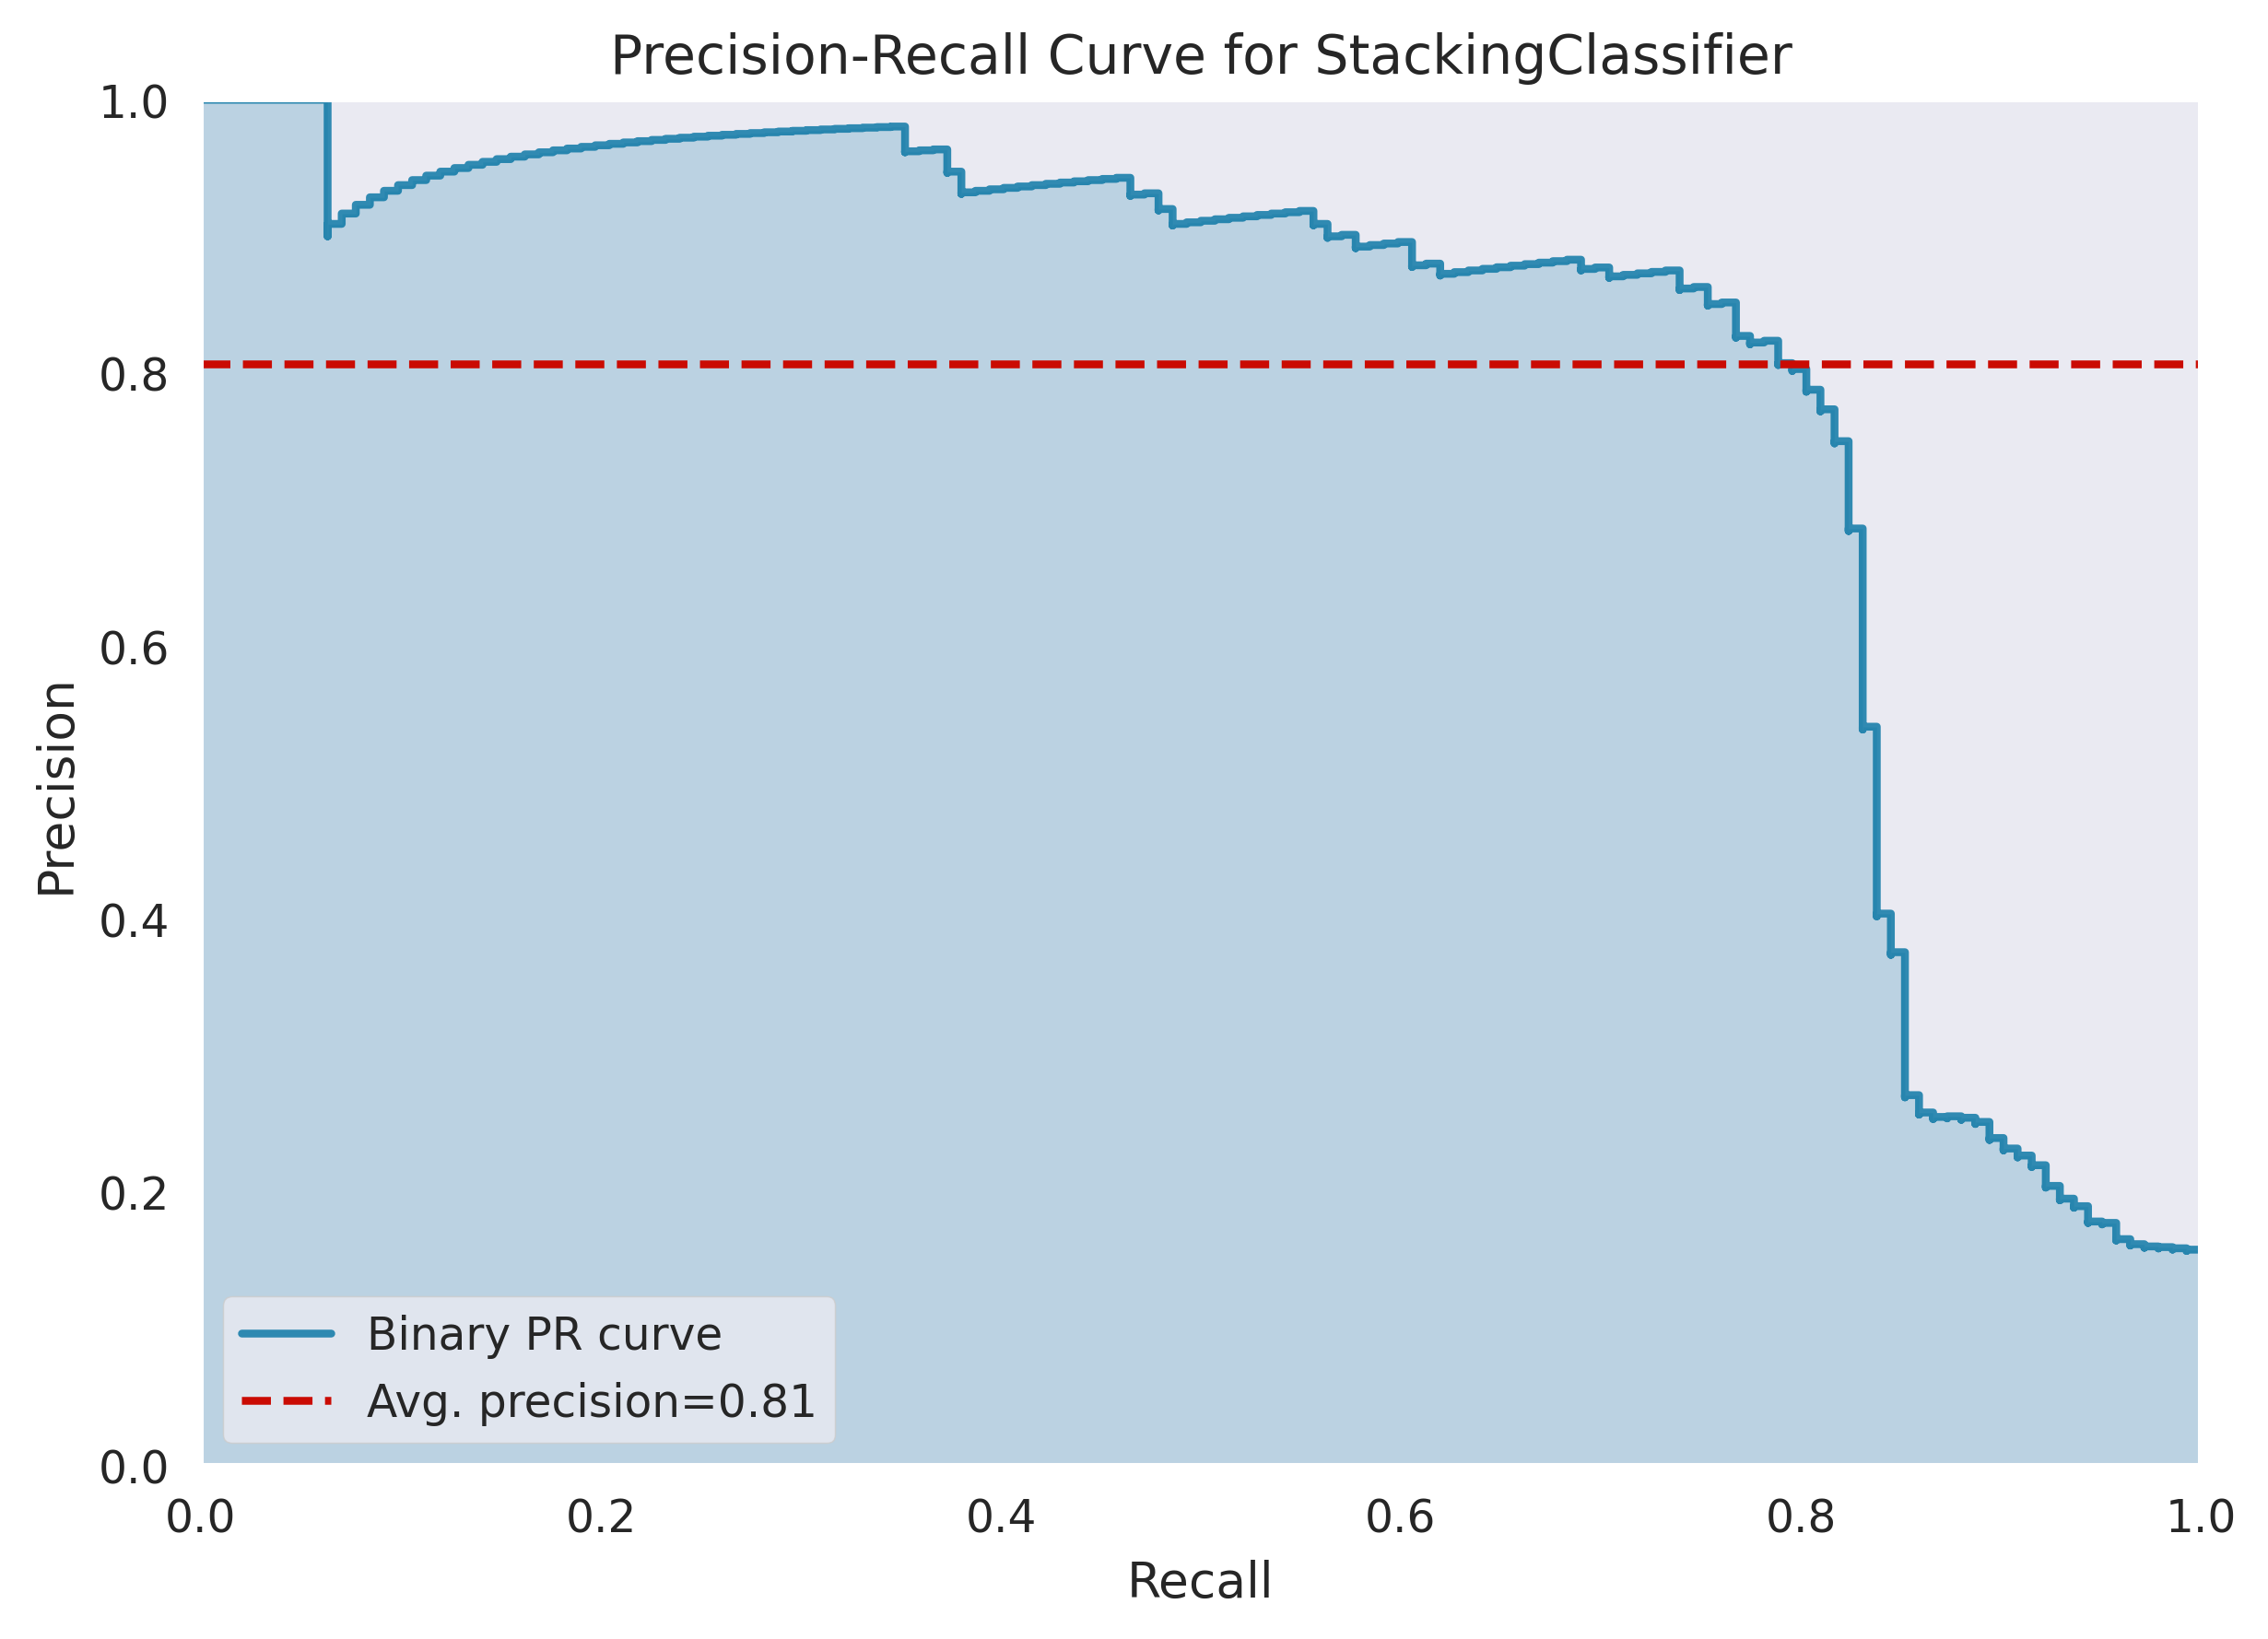

In [56]:
#plot precision-F2
plot_model(stack_model,'pr')

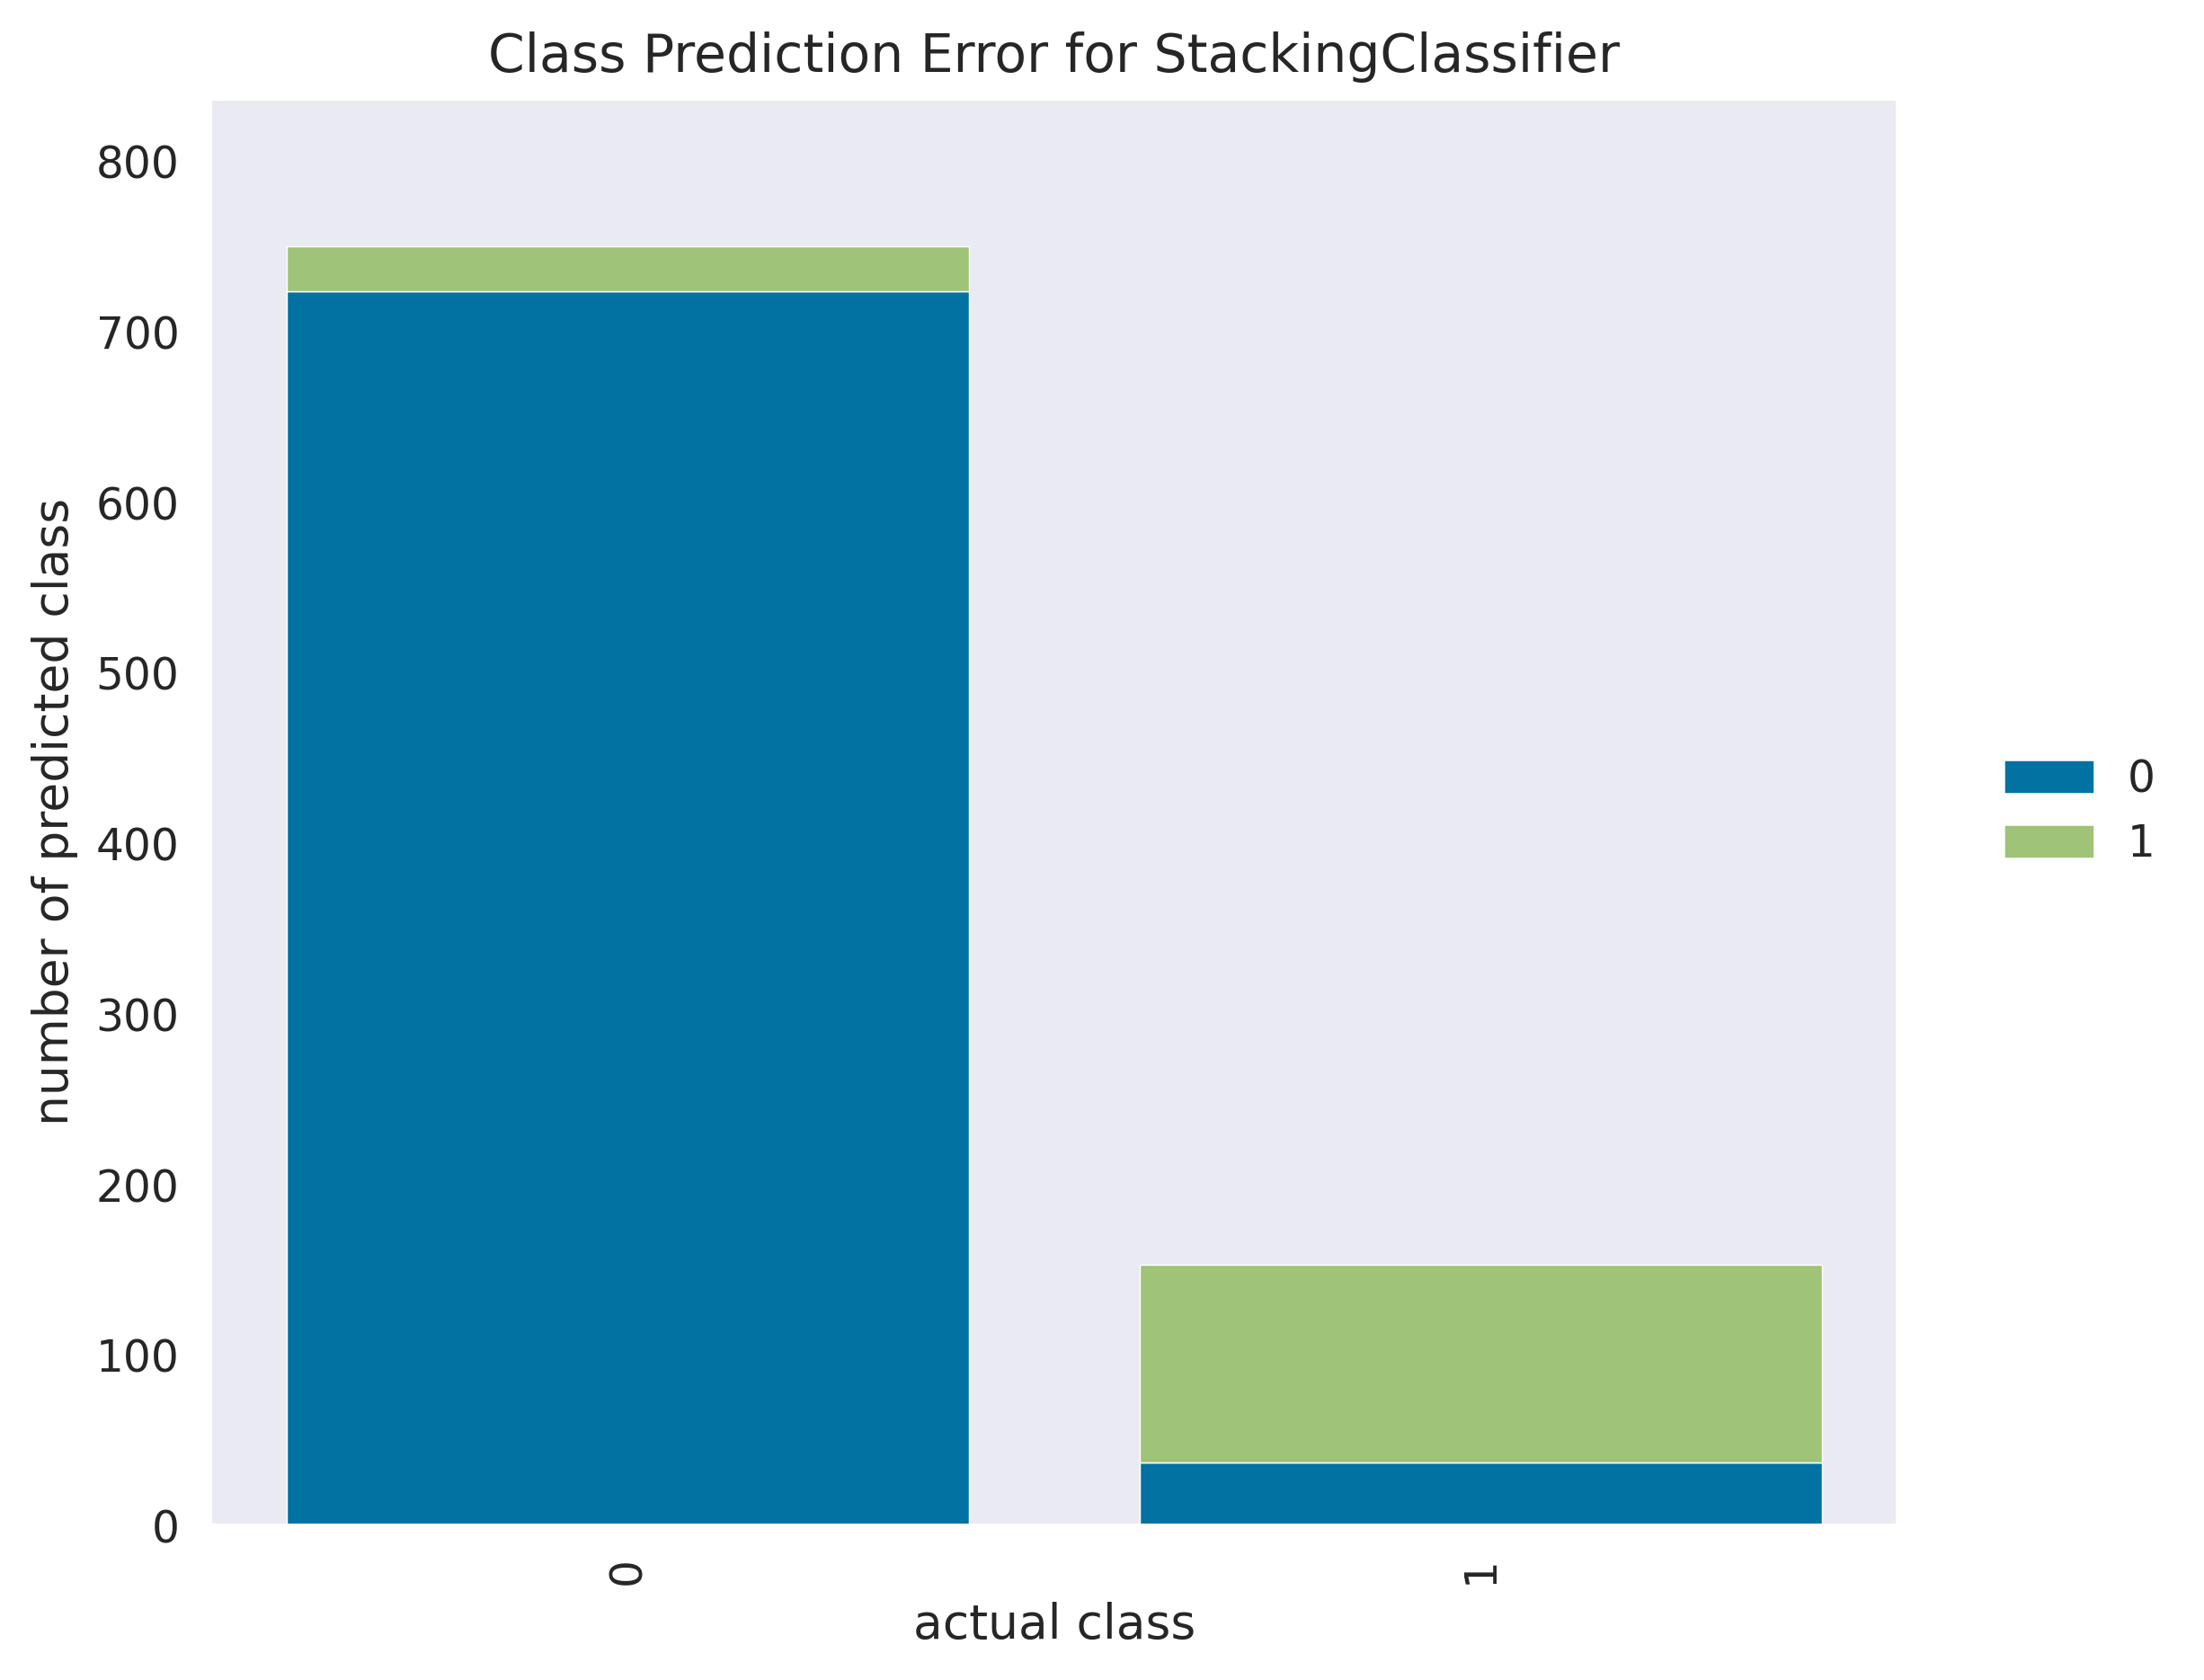

In [57]:
#plot - Class Prediction Error
plot_model(stack_model,'error' )

In [58]:
#predict on validation set
pred_holdout = predict_model(stack_model)
pred_holdout

total night calls  total intl calls_14  total day calls  number vmail messages  customer service calls_4  total intl calls_7  customer service calls_5  customer service calls_1  international plan_no  total intl calls_18  ...  total eve calls  total intl minutes  total intl calls_12  total intl calls_4  total intl calls_2  total night minutes  total intl calls_6  churn  Label   Score
0             0.215928                  0.0         1.550649              -0.636625                       0.0                 0.0                       0.0                       0.0                    1.0                  0.0  ...         0.337864           -2.004453                  0.0                 0.0                 0.0            -0.312325                 0.0      0      0  0.9624
1             0.802109                  0.0        -0.499109               1.588379                       0.0                 0.0                       0.0                       0.0                    1.0                  0.0  ...        -1.433537           -1.310184                  0.0                 0.0                 0.0             0.750988                 0.0      0      0  0.9381
2             0.056695                  0.0        -0.448100              -0.636625                       0.0                 0.0                       0.0                       1.0                    1.0                  0.0  ...        -1.233102           -0.601803                  0.0                 1.0                 0.0             0.976415                 0.0      0      0  0.9839
3             0.909064                  0.0         2.014158               1.561413                       0.0                 0.0                       0.0                       1.0                    1.0                  0.0  ...        -1.583470            0.118093                  0.0                 0.0                 0.0            -0.778632                 0.0      0      0  0.9835
4             0.109741                  0.0        -1.718849              -0.636625                       0.0                 0.0                       0.0                       0.0                    1.0                  0.0  ...         0.645050            0.156265                  0.0                 0.0                 0.0            -0.386230                 1.0      1      1  0.9691
..                 ...                  ...              ...                    ...                       ...                 ...                       ...                       ...                    ...                  ...  ...              ...                 ...                  ...                 ...                 ...                  ...                 ...    ...    ...     ...
898           0.375439                  0.0         1.242073              -0.636625                       0.0                 0.0                       0.0                       0.0                    1.0                  0.0  ...        -0.527243            0.079948                  0.0                 0.0                 0.0            -0.758573                 0.0      0      0  0.9271
899          -0.155170                  0.0         0.933859              -0.636625                       0.0                 0.0                       0.0                       0.0                    1.0                  0.0  ...         0.235674            1.079972                  0.0                 0.0                 0.0            -1.437132                 0.0      0      0  0.9764
900          -1.673919                  0.0        -0.448100               1.585197                       0.0                 0.0                       0.0                       0.0                    1.0                  0.0  ...         0.388998           -1.494389                  0.0                 0.0                 1.0            -0.656338                 0.0      0      0  0.9842
901          -1.310378                  0.0         0.062716              -0.636625  

In [59]:
#finalize
final=finalize_model(stack_model)
final

StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=42, reg_alpha=0.0,
                                               reg_lambda=0.0, silent='...
                                                           v

In [60]:
#predict on test set(unseen)
prediction=predict_model(final,data=unseen)
prediction

international plan voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total intl minutes  total intl calls  customer service calls  churn  Label   Score
1325                 no             yes                     31              153.1              115             26.03              185.9               59             15.80                224.3                102                10.0                 1                       6      1      1  0.9508
2279                 no              no                      0              113.2               86             19.24              185.5               97             15.77                237.3                145                 9.5                 5                       1      0      0  0.8726
884                  no              no                      0              254.8               85             43.32              143.4               80             12.19                153.9                102                15.0                 7                       2      0      0  0.9864
3138                 no              no                      0              147.2              121             25.02              175.2               87             14.89                136.3                 80                13.3                 3                       2      0      0  0.9796
3212                 no             yes                     38              105.0               86             17.85              121.8              123             10.35                221.5                122                 3.7                 4                       0      0      0  0.9416
...                 ...             ...                    ...                ...              ...               ...                ...              ...               ...                  ...                ...                 ...               ...                     ...    ...    ...     ...
1407                 no             yes                     31               82.3              105             13.99              256.1               91             21.77                229.6                 98                11.8                 2                       6      1      1  0.9589
1429                 no             yes                     38              209.8              130             35.67              196.6               84             16.71                233.0                 79                 7.0                 7                       1      0      0  0.9515
2480                yes              no                      0              150.0              106             25.50              293.8              123             24.97                250.7                 65                10.3                 7                       3      0      0  0.9784
468                  no             yes                     32               70.9              163             12.05              166.7              121             14.17                244.9                105                11.1                 5                       3      0      0  0.8966
695                  no              no                      0               97.6               98             16.59              105.5              118              8.97                220.2                105                11.6                 9                       1      0      0  0.9667

[159 rows x 17 columns]

In [61]:
#confusion matrix
print(confusion_matrix(prediction["churn"],prediction["Label"]))

[[126  11]
 [  2  20]]


In [62]:
# imbalanced classification report
print(classification_report_imbalanced(prediction["churn"],prediction["Label"]))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.92      0.91      0.95      0.91      0.84       137
          1       0.65      0.91      0.92      0.75      0.91      0.84        22

avg / total       0.94      0.92      0.91      0.92      0.91      0.84       159



In [63]:
save_model(final,"bigml-nov17-2022-stack_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                             verbose=0,
                                                                             warm_start=False))],
                                     final_estimator=LogisticRegression(C=1.0,
         